# 1. Data expoloration


In [3]:
import time, matplotlib, sklearn

# visualizatoin 
import matplotlib.pyplot as plt 

# data wrangling
import pandas as pd
import numpy as np 
import seaborn as sns

# data preprocessing
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import VarianceThreshold
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from imblearn.over_sampling import SMOTE

# learning
from sklearn.linear_model import LogisticRegression

# the data intro has been tested with the following versions
print("pandas        Tested version: 2.0.3   Your version: %s" % pd.__version__)
print("numpy         Tested version: 1.21.5  Your version: %s" % np.__version__)
print("matplotlib    Tested version: 3.5.3   Your version: %s" % matplotlib.__version__)
print("scikit-learn  Tested version: 1.2.2   Your version: %s" % sklearn.__version__)

pandas        Tested version: 2.0.3   Your version: 2.0.3
numpy         Tested version: 1.21.5  Your version: 1.23.5
matplotlib    Tested version: 3.5.3   Your version: 3.7.0
scikit-learn  Tested version: 1.2.2   Your version: 1.2.2


In [4]:
# description
description = pd.read_csv('data/WiDS_Datathon_2020_Dictionary.csv')
description_dict = description.set_index('Variable Name').to_dict(orient='index')
# data
df = pd.read_csv('data/training_v2.csv')

df.head()

encounter_id  patient_id  hospital_id  hospital_death   age    bmi  \
0         66154       25312          118               0  68.0  22.73   
1        114252       59342           81               0  77.0  27.42   
2        119783       50777          118               0  25.0  31.95   
3         79267       46918          118               0  81.0  22.64   
4         92056       34377           33               0  19.0    NaN   

   elective_surgery  ethnicity gender  height  ... aids cirrhosis  \
0                 0  Caucasian      M   180.3  ...  0.0       0.0   
1                 0  Caucasian      F   160.0  ...  0.0       0.0   
2                 0  Caucasian      F   172.7  ...  0.0       0.0   
3                 1  Caucasian      F   165.1  ...  0.0       0.0   
4                 0  Caucasian      M   188.0  ...  0.0       0.0   

   diabetes_mellitus hepatic_failure immunosuppression  leukemia  lymphoma  \
0                1.0             0.0               0.0       0.0       0.0   
1                1.0             0.0               0.0       0.0       0.0   
2                0.0             0.0               0.0       0.0       0.0   
3                0.0             0.0               0.0       0.0       0.0   
4                0.0             0.0               0.0       0.0       0.0   

   solid_tumor_with_metastasis  apache_3j_bodysystem  apache_2_bodysystem  
0                          0.0                Sepsis       Cardiovascular  
1                          0.0           Respiratory          Respiratory  
2                          0.0             Metabolic            Metabolic  
3                          0.0        Cardiovascular       Cardiovascular  
4                          0.0                Trauma               Trauma  

[5 rows x 186 columns]

In [159]:
description_dict

{'encounter_id': {'Category': 'identifier',
  'Unit of Measure': nan,
  'Data Type': 'integer',
  'Description': 'Unique identifier associated with a patient unit stay',
  'Example': nan},
 'hospital_id': {'Category': 'identifier',
  'Unit of Measure': nan,
  'Data Type': 'integer',
  'Description': 'Unique identifier associated with a hospital',
  'Example': nan},
 'patient_id': {'Category': 'identifier',
  'Unit of Measure': nan,
  'Data Type': 'integer',
  'Description': 'Unique identifier associated with a patient',
  'Example': nan},
 'hospital_death': {'Category': 'demographic',
  'Unit of Measure': nan,
  'Data Type': 'binary',
  'Description': 'Whether the patient died during this hospitalization',
  'Example': '0'},
 'age': {'Category': 'demographic',
  'Unit of Measure': 'Years',
  'Data Type': 'numeric',
  'Description': 'The age of the patient on unit admission',
  'Example': nan},
 'bmi': {'Category': 'demographic',
  'Unit of Measure': 'kilograms/metres^2',
  'Data Type':

In [3]:
# Check the data set for missing values
print(df.info())

# Descriptive statistics for each variable in the statistical data set
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91713 entries, 0 to 91712
Columns: 186 entries, encounter_id to apache_2_bodysystem
dtypes: float64(170), int64(8), object(8)
memory usage: 130.1+ MB
None
        encounter_id     patient_id   hospital_id  hospital_death  \
count   91713.000000   91713.000000  91713.000000    91713.000000   
mean    65606.079280   65537.131464    105.669262        0.086302   
std     37795.088538   37811.252183     62.854406        0.280811   
min         1.000000       1.000000      2.000000        0.000000   
25%     32852.000000   32830.000000     47.000000        0.000000   
50%     65665.000000   65413.000000    109.000000        0.000000   
75%     98342.000000   98298.000000    161.000000        0.000000   
max    131051.000000  131051.000000    204.000000        1.000000   

                age           bmi  elective_surgery        height  \
count  87485.000000  88284.000000      91713.000000  90379.000000   
mean      62.309516     29.185818  

## 1.1 Missing vales statistics

Missing value statistics：
                               Missing Values Percentage
encounter_id                                0      0.00%
patient_id                                  0      0.00%
hospital_id                                 0      0.00%
hospital_death                              0      0.00%
age                                      4228      4.61%
bmi                                      3429      3.74%
elective_surgery                            0      0.00%
ethnicity                                1395      1.52%
gender                                     25      0.03%
height                                   1334      1.45%
hospital_admit_source                   21409     23.34%
icu_admit_source                          112      0.12%
icu_id                                      0      0.00%
icu_stay_type                               0      0.00%
icu_type                                    0      0.00%
pre_icu_los_days                            0      0.00%
readm

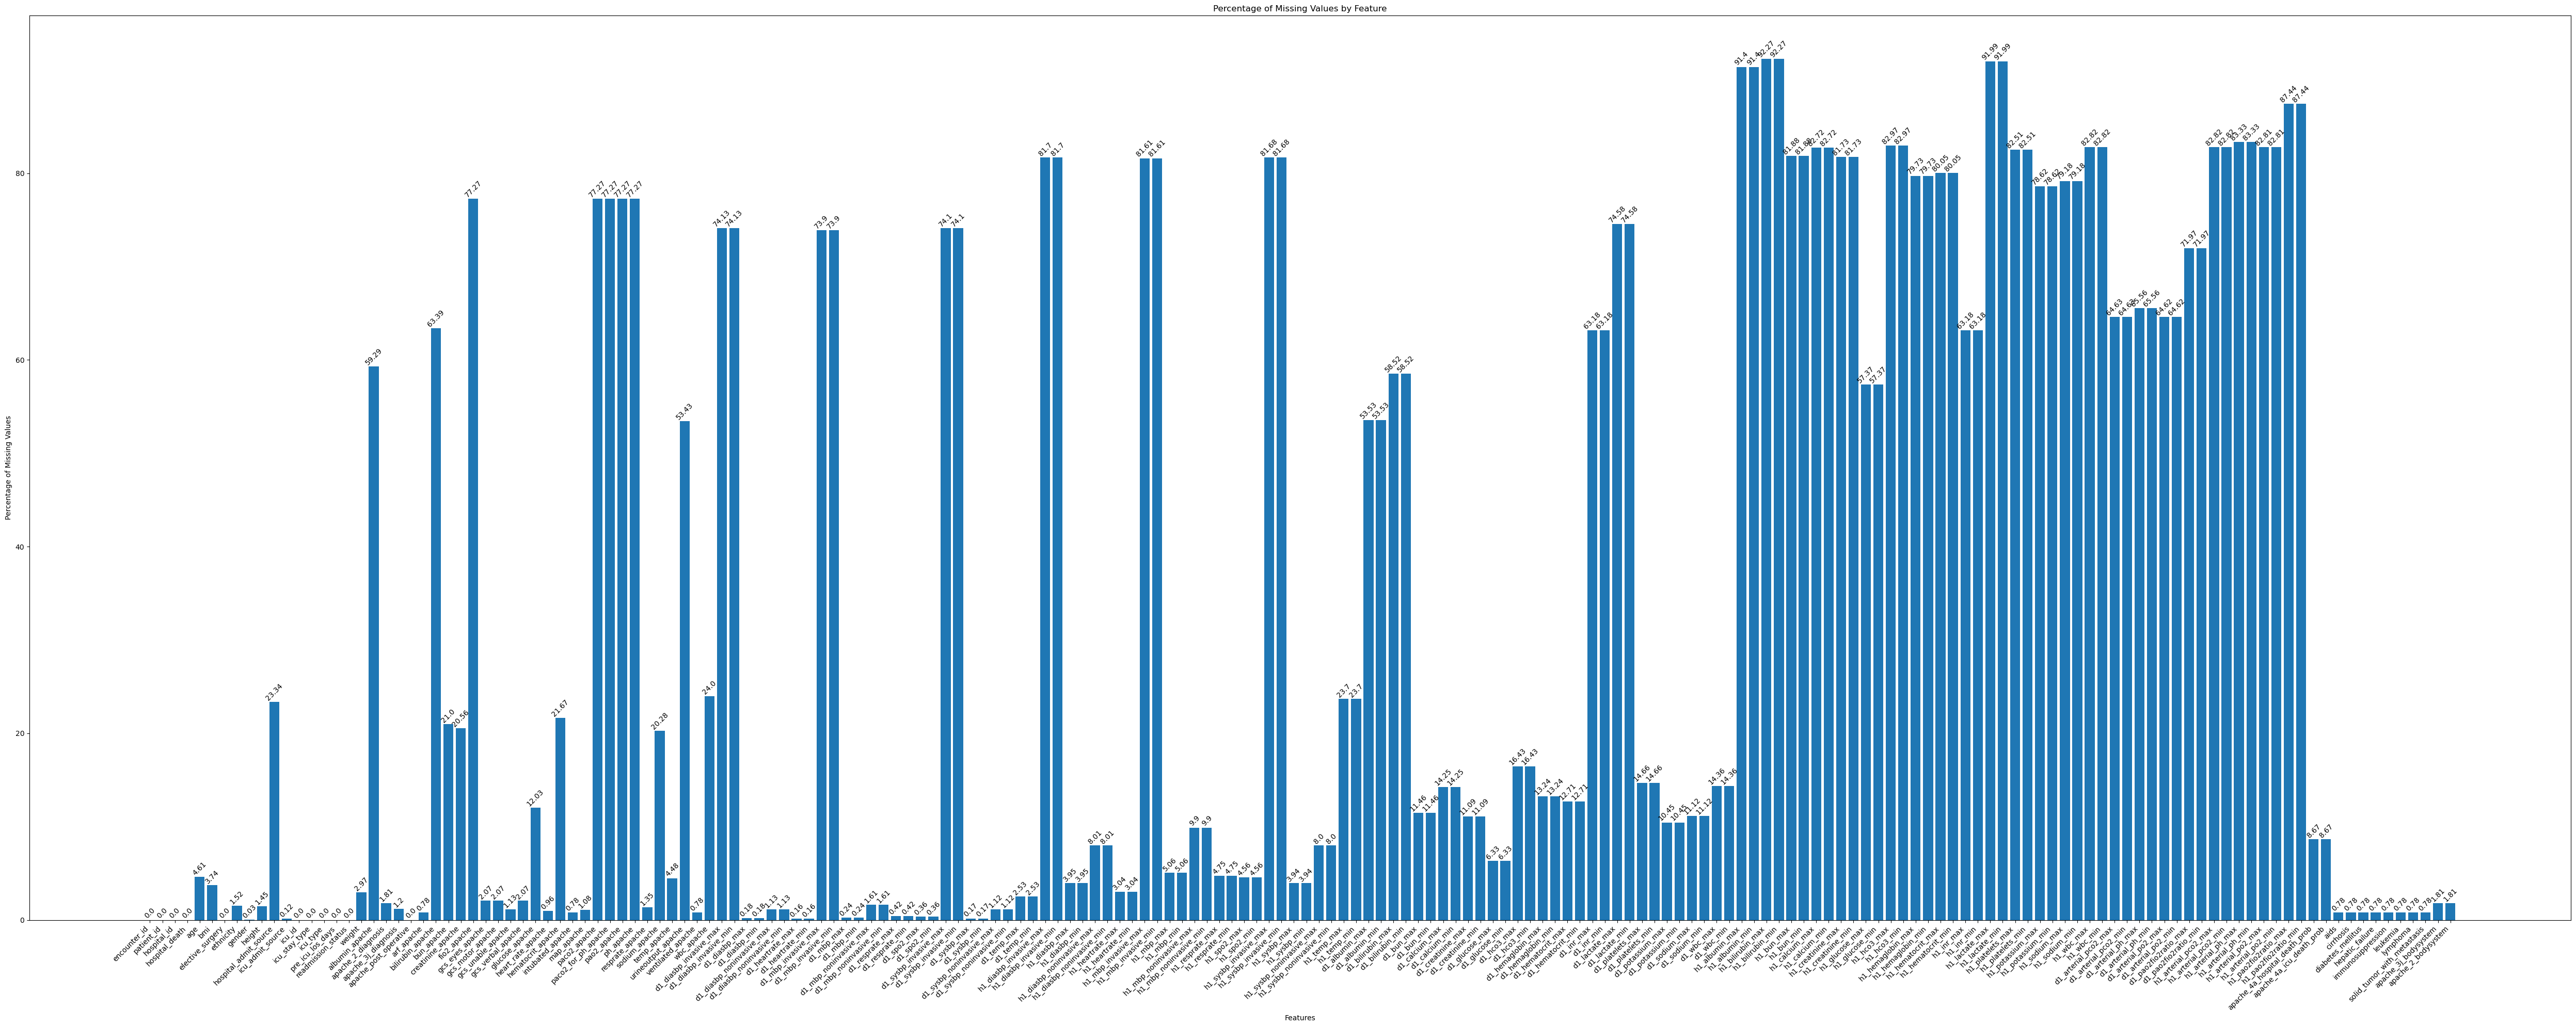

In [4]:
# Missing values
# Check the data set for missing values
missing_values = df.isnull()

# Count the number of missing values in each column
missing_count = missing_values.sum()

# Calculate the proportion of missing values in each column
missing_percentage = (missing_count / len(df)) * 100

# Create a DataFrame that contains missing value statistics
missing_data_info = pd.DataFrame({'Missing Values': missing_count, 'Percentage': missing_percentage})
missing_data_info['Percentage'] = missing_data_info['Percentage'].apply(lambda x: f'{x:.2f}%')
print("Missing value statistics：")
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
print(missing_data_info)

# Visualize
missing_data_info['Percentage'] = missing_data_info['Percentage'].str.rstrip('%').astype(float)
plt.figure(figsize=(50, 20))  # figure size
plt.bar(missing_data_info.index, missing_data_info['Percentage'])
plt.title('Percentage of Missing Values by Feature')
plt.xlabel('Features')
plt.ylabel('Percentage of Missing Values')
plt.xticks(np.arange(0, len(missing_data_info.index), 1), rotation=45, ha='right')
plt.tight_layout()  # Prevent label overlap
for i, percentage in enumerate(missing_data_info['Percentage']):
    plt.text(i, percentage, percentage, ha='center', va='bottom', rotation=45)
plt.show()




## 1.2 Data distribution

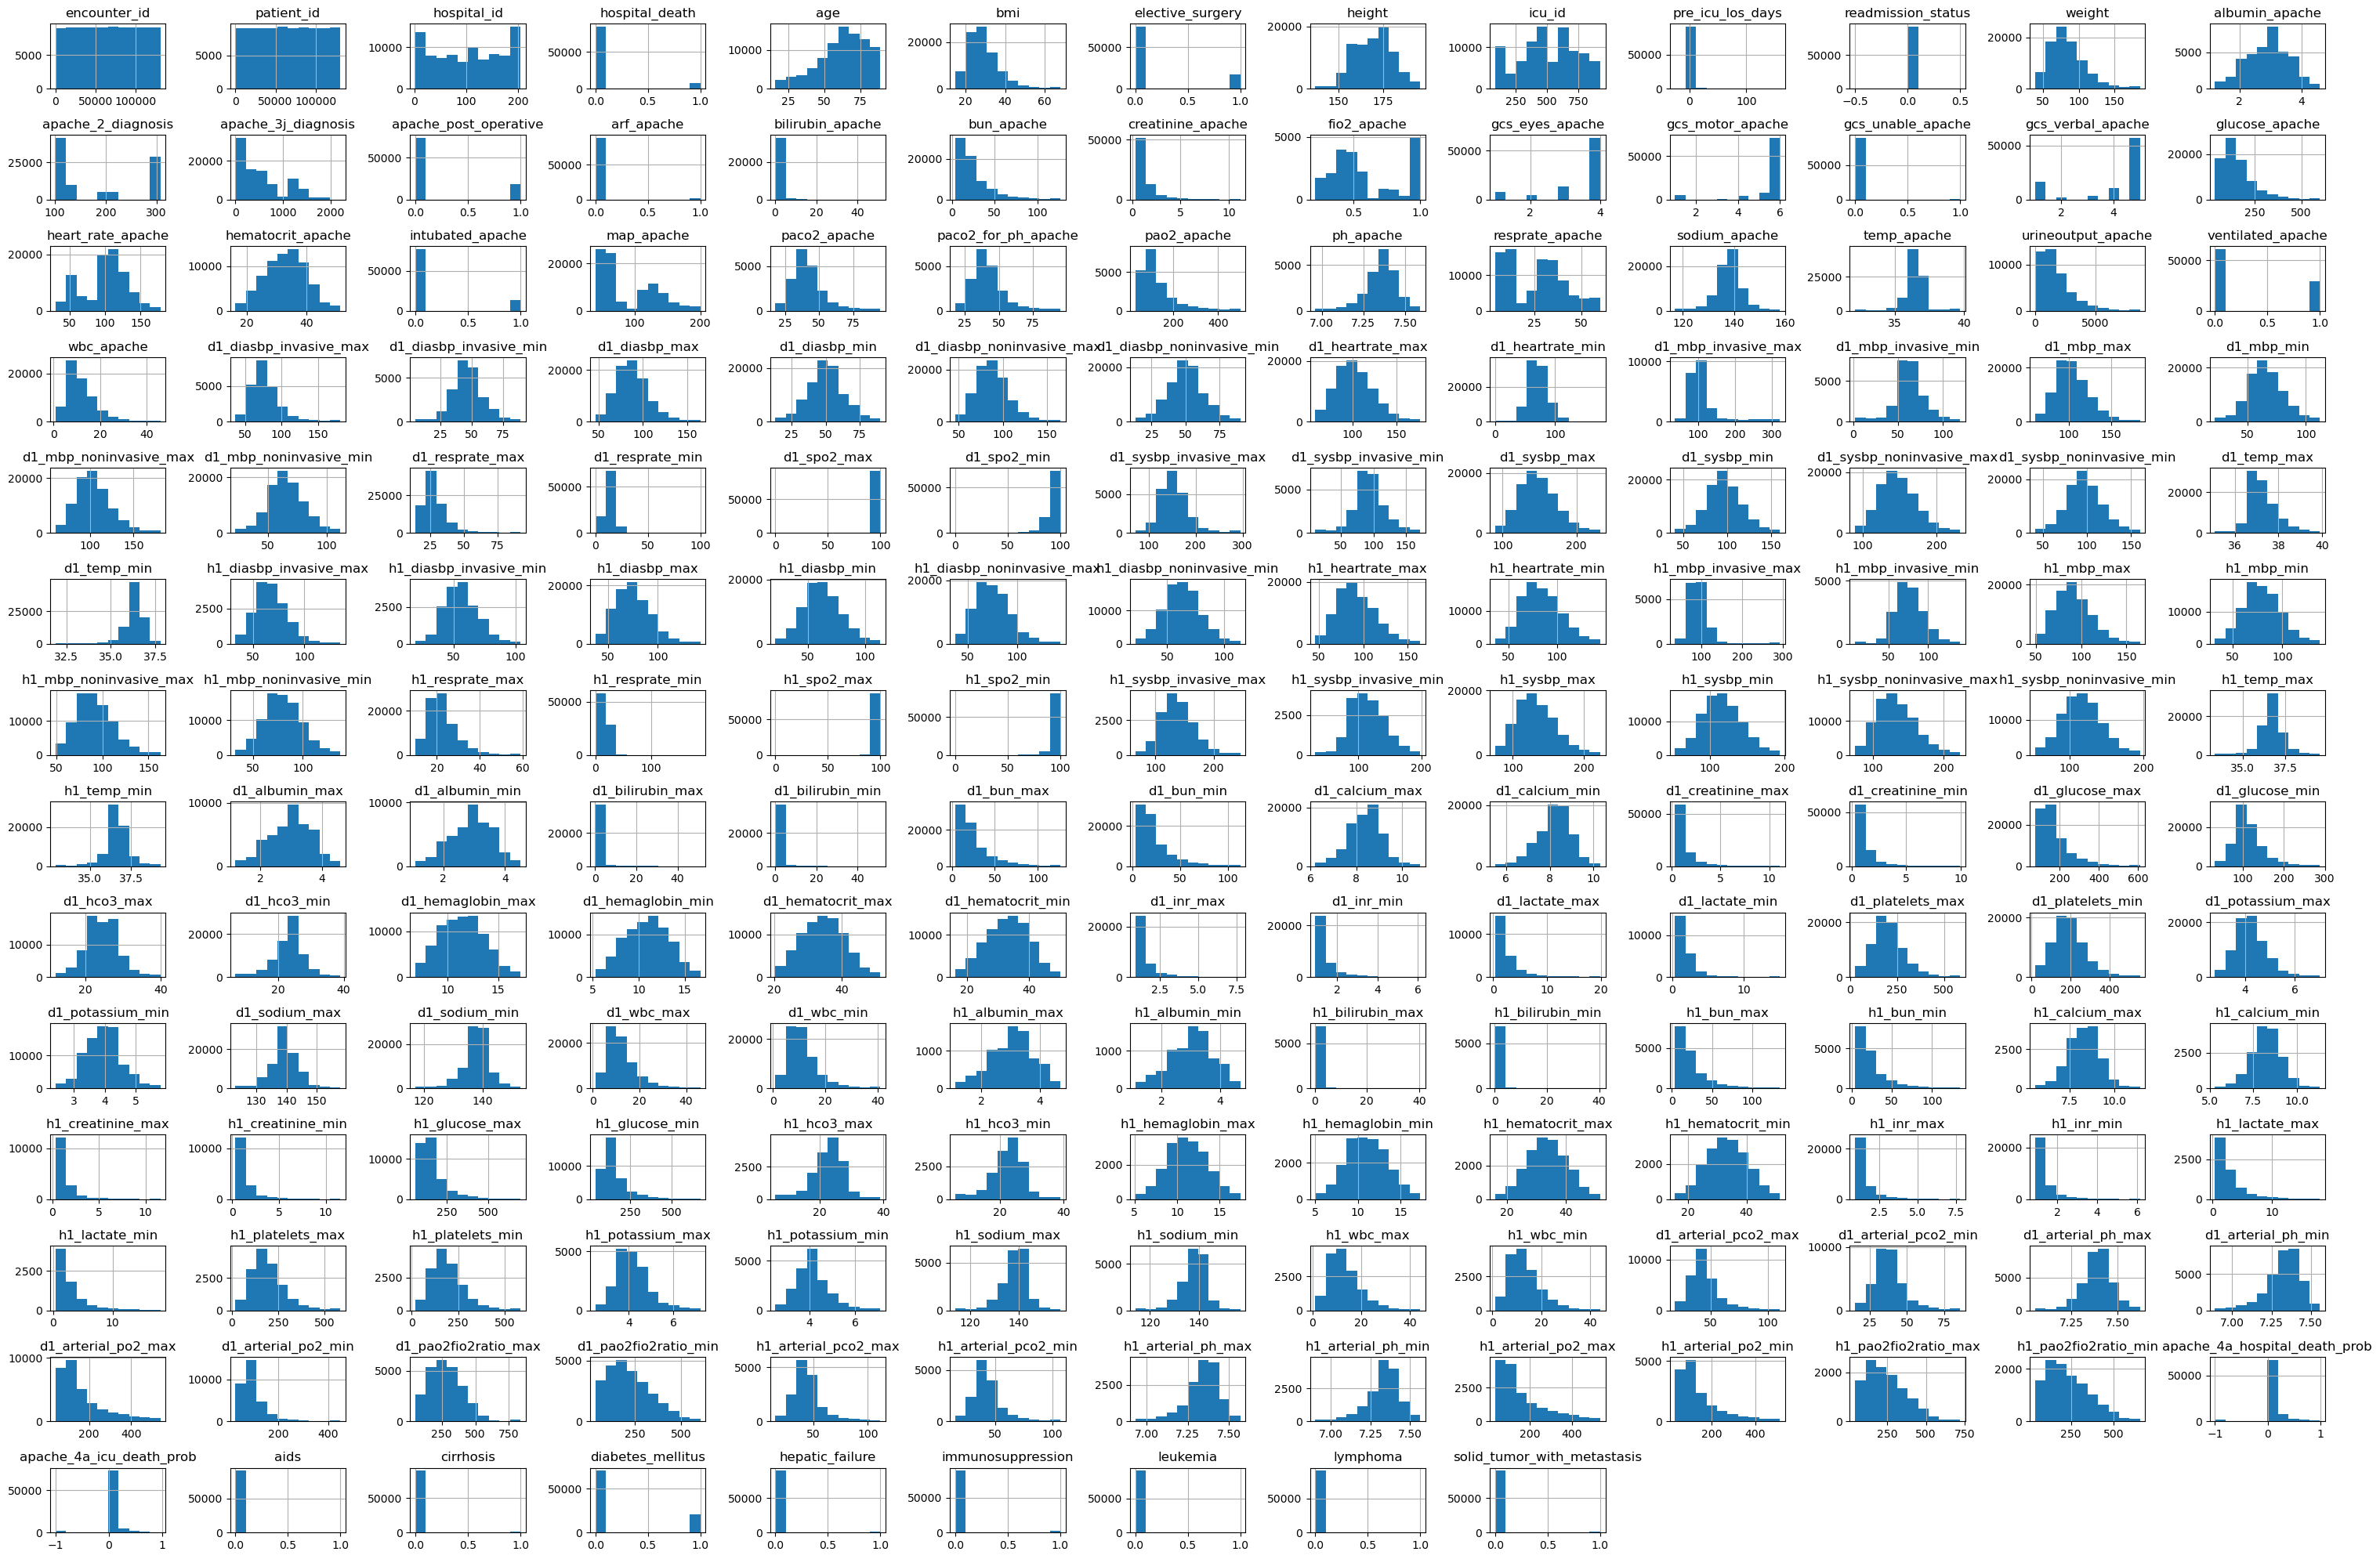

In [5]:
# Histogram of data distribution
df.hist(figsize=(30, 20))
plt.tight_layout()
plt.show()


## 1.3 Pairwise correlations

In [6]:
# # Calculate the correlation coefficient matrix
# selected_variables = df.columns[:186] 
# correlation_matrix = df[selected_variables].corr()
# print(correlation_matrix)
# # Heatmap visualization
# plt.figure(figsize=(80, 70))
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
# plt.title('Correlation Matrix')
# plt.tight_layout()
# plt.show()

# 2. Data pre-pocessing

## 2.1 Delate features

In [7]:
# Delate features
# Set the proportion threshold of missing values
threshold = 20

# Find features with missing value proportion greater than the threshold
features_to_drop = missing_data_info[missing_data_info['Percentage'] > threshold].index.tolist()

# Ensure that feature names exist in the column labels of the DataFrame
features_to_drop = [feature for feature in features_to_drop if feature in df.columns]

# Delete features if they exist
if features_to_drop:
    # Delete features
    df = df.drop(features_to_drop, axis=1)
    
    # Print deleted features
    print("Deleted features: ")
    for i in range(0, len(features_to_drop), 5):
        print(', '.join(features_to_drop[i:i+5]))

    # Print missing value statistics for the remaining features
    remaining_features_count = len(df.columns)
    print("Number of remaining features:", remaining_features_count)
    remaining_missing_values = df.isnull().sum()
    remaining_missing_percentage = (remaining_missing_values / len(df)) * 100
    remaining_missing_data_info = pd.DataFrame({'Missing Values': remaining_missing_values, 'Percentage': remaining_missing_percentage})
    remaining_missing_data_info['Percentage'] = remaining_missing_data_info['Percentage'].apply(lambda x: f'{x:.2f}%')
    print("Missing value statistics for the remaining features: ")
    print(remaining_missing_data_info)

    # Save the processed data set to a new CSV file
    df.to_csv('cleaned_data.csv', index=False)
    print("The processed data set is saved to cleaned_data.csv file")
else:
    print("No features to delete, the original data set is saved to cleaned_data.csv file")

Deleted features: 
hospital_admit_source, albumin_apache, bilirubin_apache, bun_apache, creatinine_apache
fio2_apache, hematocrit_apache, paco2_apache, paco2_for_ph_apache, pao2_apache
ph_apache, sodium_apache, urineoutput_apache, wbc_apache, d1_diasbp_invasive_max
d1_diasbp_invasive_min, d1_mbp_invasive_max, d1_mbp_invasive_min, d1_sysbp_invasive_max, d1_sysbp_invasive_min
h1_diasbp_invasive_max, h1_diasbp_invasive_min, h1_mbp_invasive_max, h1_mbp_invasive_min, h1_sysbp_invasive_max
h1_sysbp_invasive_min, h1_temp_max, h1_temp_min, d1_albumin_max, d1_albumin_min
d1_bilirubin_max, d1_bilirubin_min, d1_inr_max, d1_inr_min, d1_lactate_max
d1_lactate_min, h1_albumin_max, h1_albumin_min, h1_bilirubin_max, h1_bilirubin_min
h1_bun_max, h1_bun_min, h1_calcium_max, h1_calcium_min, h1_creatinine_max
h1_creatinine_min, h1_glucose_max, h1_glucose_min, h1_hco3_max, h1_hco3_min
h1_hemaglobin_max, h1_hemaglobin_min, h1_hematocrit_max, h1_hematocrit_min, h1_inr_max
h1_inr_min, h1_lactate_max, h1_lacta

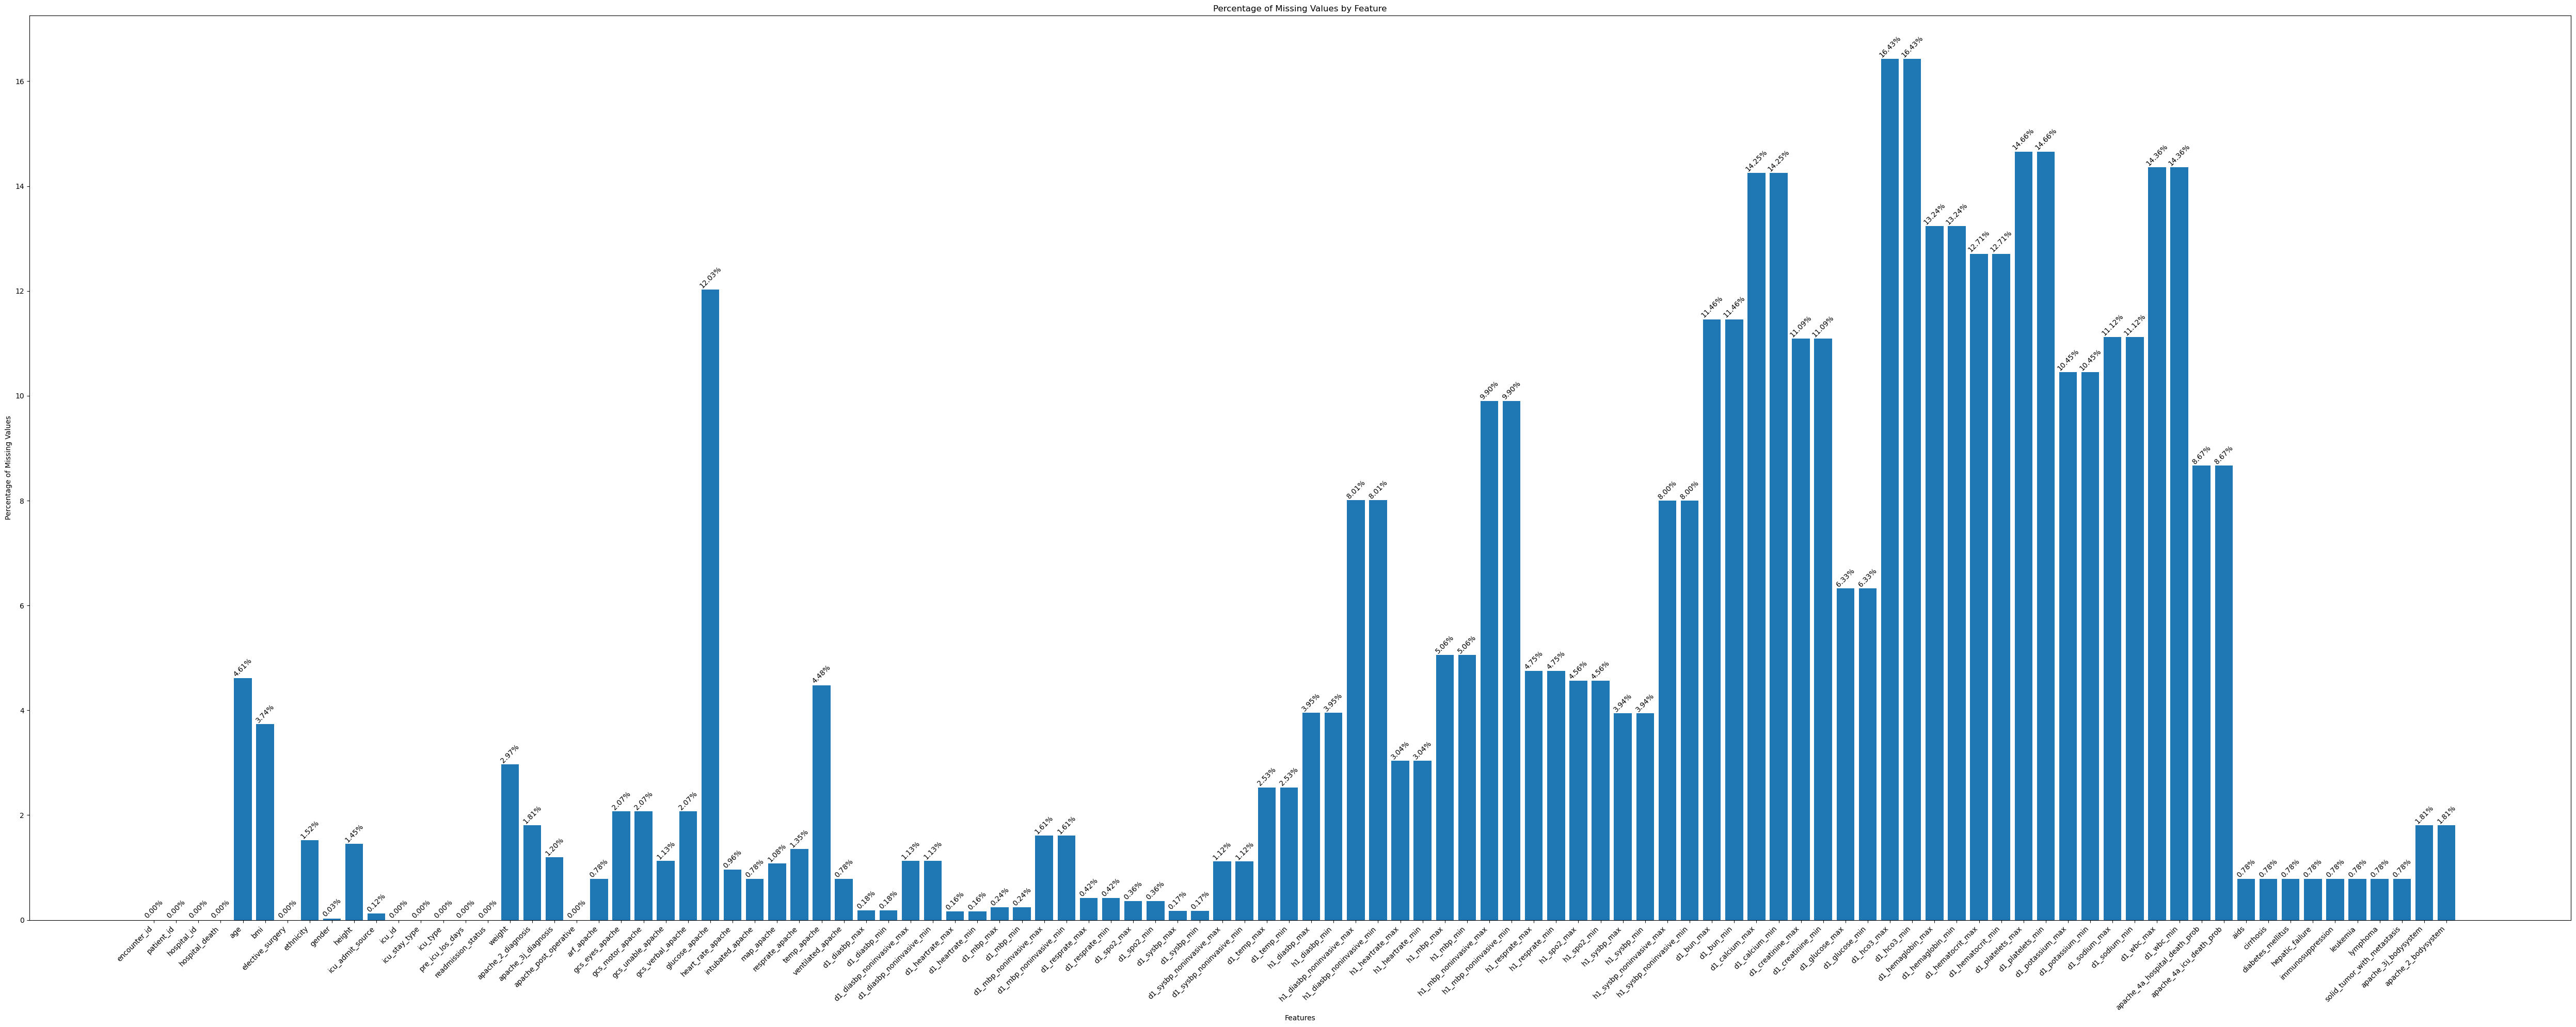

In [8]:
# Read cleaned_data.csv file
df = pd.read_csv('cleaned_data.csv')

# Calculate missing value statistics
missing_values = df.isnull()
missing_count = missing_values.sum()
missing_percentage = (missing_count / len(df)) * 100
missing_data_info = pd.DataFrame({'Missing Values': missing_count, 'Percentage': missing_percentage})
missing_data_info['Percentage'] = missing_data_info['Percentage'].apply(lambda x: f'{x:.2f}%')

# Visualize
missing_data_info['Percentage'] = missing_data_info['Percentage'].str.rstrip('%').astype(float)
plt.figure(figsize=(50, 20))  
plt.bar(missing_data_info.index, missing_data_info['Percentage'])
plt.title('Percentage of Missing Values by Feature')
plt.xlabel('Features')
plt.ylabel('Percentage of Missing Values')
plt.xticks(np.arange(0, len(missing_data_info.index), 1), rotation=45, ha='right')
plt.tight_layout()  
for i, percentage in enumerate(missing_data_info['Percentage']):
    plt.text(i, percentage, f'{percentage:.2f}%', ha='center', va='bottom', rotation=45)  # 修改此处以保留两位小数
plt.show()


## 2.2 One-Hot Encoding

In [9]:
# One-Hot Encoding
categorical_columns = df.select_dtypes(include=['object']).columns
encoder = OneHotEncoder()
df_encoded = pd.DataFrame(encoder.fit_transform(df[categorical_columns]).toarray(), columns=encoder.get_feature_names_out(categorical_columns))

# Combine the encoded feature with the numerical feature
df_numeric = df.select_dtypes(exclude=['object'])
df_combined = pd.concat([df_numeric, df_encoded], axis=1)
print("Finished One-Hot Encoding")

Finished One-Hot Encoding


## 2.3 KNNImputer

In [5]:
# # KnnImputer usually take more than 20 mintues please be patience.
# # The missing values are imputed using KNNImputer
# imputer = KNNImputer(n_neighbors=5)
# df_imputed = pd.DataFrame(imputer.fit_transform(df_combined), columns=df_combined.columns)

# # Save to .csv file
# df_imputed.to_csv('cleaned_data_imputed.csv', index=False)
# print("The imputed data set is saved to cleaned_data_imputed.csv 文件")

Number of features: 147
Missing value statistics for the imputed data set:
                                         Missing Values Percentage
encounter_id                                          0      0.00%
patient_id                                            0      0.00%
hospital_id                                           0      0.00%
hospital_death                                        0      0.00%
age                                                   0      0.00%
...                                                 ...        ...
apache_2_bodysystem_Respiratory                       0      0.00%
apache_2_bodysystem_Trauma                            0      0.00%
apache_2_bodysystem_Undefined Diagnoses               0      0.00%
apache_2_bodysystem_Undefined diagnoses               0      0.00%
apache_2_bodysystem_nan                               0      0.00%

[147 rows x 2 columns]


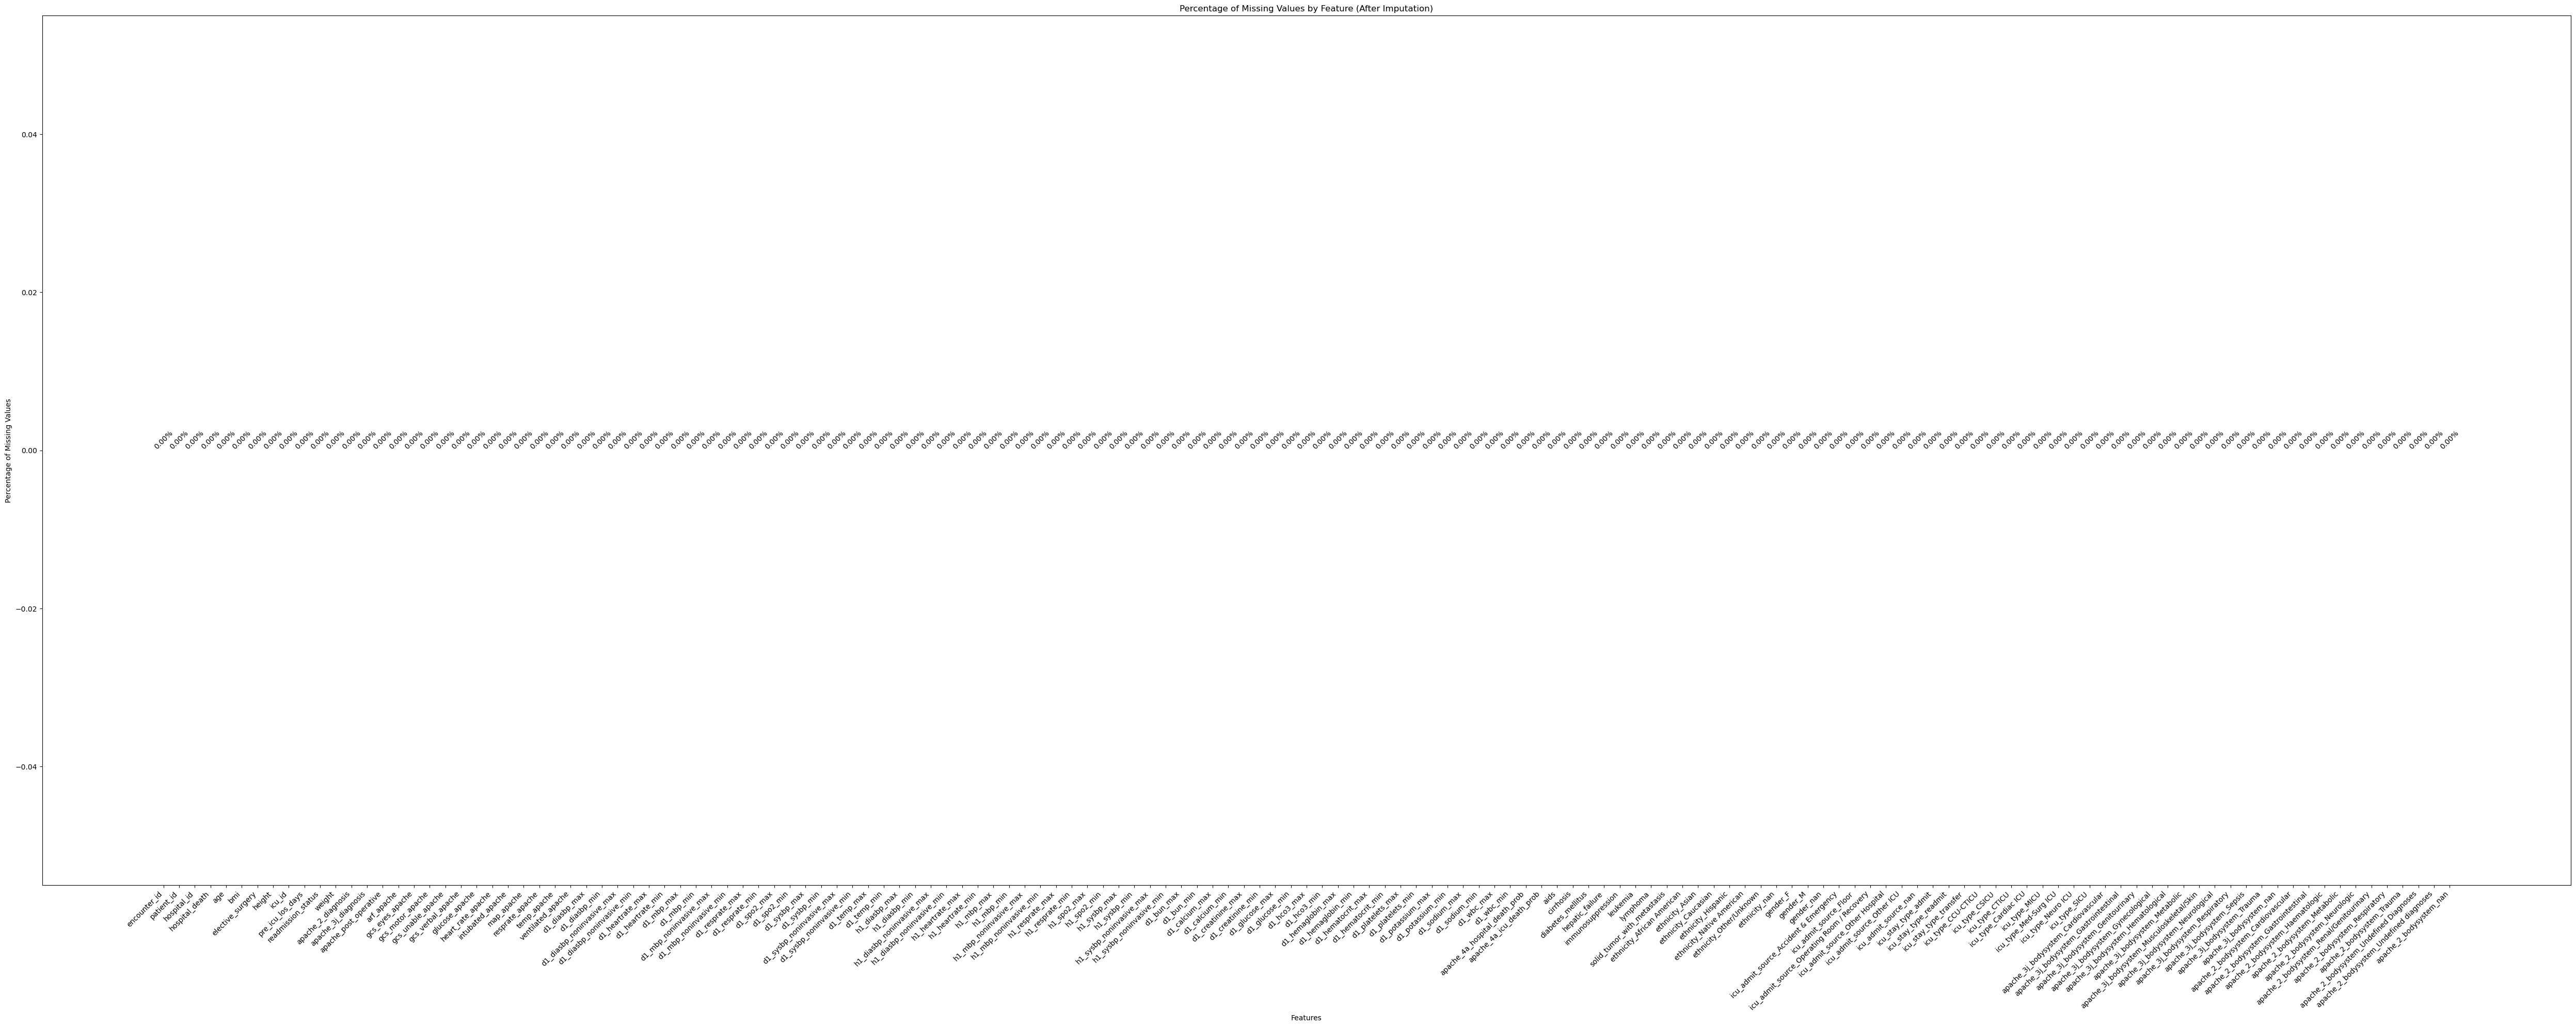

In [6]:
# Read the imputed data set
df_imputed = pd.read_csv('cleaned_data_imputed.csv')

# Statistical feature quantity
num_features = df_imputed.shape[1]
print("Number of features:", num_features)

# Calculates missing value statistics for the imputed data set
missing_values_imputed = df_imputed.isnull()
missing_count_imputed = missing_values_imputed.sum()
missing_percentage_imputed = (missing_count_imputed / len(df_imputed)) * 100
missing_data_info_imputed = pd.DataFrame({'Missing Values': missing_count_imputed, 'Percentage': missing_percentage_imputed})
missing_data_info_imputed['Percentage'] = missing_data_info_imputed['Percentage'].apply(lambda x: f'{x:.2f}%')
print("Missing value statistics for the imputed data set:")
print(missing_data_info_imputed)

# Visualize
missing_data_info_imputed['Percentage'] = missing_data_info_imputed['Percentage'].str.rstrip('%').astype(float)
plt.figure(figsize=(50, 20)) 
plt.bar(missing_data_info_imputed.index, missing_data_info_imputed['Percentage'])
plt.title('Percentage of Missing Values by Feature (After Imputation)')
plt.xlabel('Features')
plt.ylabel('Percentage of Missing Values')
plt.xticks(np.arange(0, len(missing_data_info_imputed.index), 1), rotation=45, ha='right')
plt.tight_layout()  
for i, percentage in enumerate(missing_data_info_imputed['Percentage']):
    plt.text(i, percentage, f'{percentage:.2f}%', ha='center', va='bottom', rotation=45)  
plt.show()


## 2.4 Divide dataset

In [7]:
# Select features manually
# save target variable
y = df_imputed['hospital_death'].copy()
# save APACHE scores for later evaluation on train / test / validation data
y_apache = df_imputed['apache_4a_hospital_death_prob'].copy()
# delate some features and save the rest
X = df_imputed.copy().drop(['hospital_death', 'patient_id', 'encounter_id', 'hospital_id', 'icu_id', # drop identifiers
                    'apache_4a_hospital_death_prob', 'apache_4a_icu_death_prob', # drop APACHE scores
                    'apache_2_bodysystem_Cardiovascular', 'apache_2_bodysystem_Gastrointestinal', 'apache_2_bodysystem_Haematologic', 'apache_2_bodysystem_Metabolic', 'apache_2_bodysystem_Neurologic', 'apache_2_bodysystem_Renal/Genitourinary', 'apache_2_bodysystem_Respiratory', 'apache_2_bodysystem_Trauma', 'apache_2_bodysystem_Undefined Diagnoses', 'apache_2_bodysystem_Undefined diagnoses', 'apache_2_bodysystem_nan'], # drop because of similarity with apache_3j_bodysystem
                   axis=1)
print("Finish manually select features")

# Statistical feature quantity
num_features = X.shape[1]
print("Number of features left:", num_features)

Finish manually select features
Number of features left: 129


In [8]:
# Divide the data set into a training set and a test set
X_train, X_test, y_train, y_test, y_apache_train, y_apache_test = train_test_split(X, y, y_apache, test_size=0.2, random_state=42)

# Divide the test set into test set and validation set
X_test, X_val, y_test, y_val, y_apache_test, y_apache_val = train_test_split(X_test, y_test, y_apache_test, test_size=0.5, random_state=42)

# Print the partitioned data set shape
print("Training set shapes - Features: {}, Target: {}, Apache Score: {}".format(X_train.shape, y_train.shape, y_apache_train.shape))
print("Testing set shapes - Features: {}, Target: {}, Apache Score: {}".format(X_test.shape, y_test.shape, y_apache_test.shape))
print("Validation set shapes - Features: {}, Target: {}, Apache Score: {}".format(X_val.shape, y_val.shape, y_apache_val.shape))

Training set shapes - Features: (73370, 129), Target: (73370,), Apache Score: (73370,)
Testing set shapes - Features: (9171, 129), Target: (9171,), Apache Score: (9171,)
Validation set shapes - Features: (9172, 129), Target: (9172,), Apache Score: (9172,)


In [9]:
len(X_train)

73370

In [10]:
# pip install -U threadpoolctl

## 2.5 SMOTE Oversampling

In [11]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE object
smote = SMOTE(random_state=42)

# Oversampling the training set
X_train_res, y_train_res= smote.fit_resample(X_train, y_train)

# Print the number of samples after oversampling
print("Number of samples after SMOTE over-sampling:", len(X_train_res))


Number of samples after SMOTE over-sampling: 134084


In [12]:
len(y_train[y_train == 0]), len(y_train[y_train == 1])

(67042, 6328)

In [13]:
len(y_train_res[y_train_res == 0]), len(y_train_res[y_train_res == 1])

(67042, 67042)

# 3. Model Selection

## 3.1. Useful functions

In [14]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


def showConfusionMatrix(cm):
    plt.figure(figsize=(10,7))
    sns.heatmap(cm, annot=True, fmt="d")
    plt.title('Confusion Matrix')
    plt.ylabel('Actual Values')
    plt.xlabel('Predicted Values')
    plt.show()

In [15]:
def getMetrics(cm):
    tn, fp, fn, tp = cm.ravel()
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    f1 = 2 * (precision * recall) / (precision + recall)
    tnr = tn / (tn + fp)
    tpr = tp / (tp + fn)
    
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1: {f1:.2f}")
    print(f"True Positive Rate (TPR): {tpr}")
    print(f"True Negative Rate (TNR): {tnr}")

    return accuracy, precision, recall, f1, tnr, tpr

In [108]:
def showRelevantMetrics(cm):
    tn, fp, fn, tp = cm.ravel()
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    f1 = 2 * (precision * recall) / (precision + recall)
    tnr = tn / (tn + fp)
    tpr = tp / (tp + fn)
    
    print(f"Accuracy: {accuracy:.2f}")
    print(f"True Positive Rate (TPR): {tpr:.2f}")
    print(f"True Negative Rate (TNR): {tnr:.2f}")

In [16]:
from sklearn.metrics import roc_auc_score, roc_curve

def plotROC(y_true, y_scores, auc_roc, name):
    fpr, tpr, thresholds = roc_curve(y_true, y_scores)
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {auc_roc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC for {name}')
    plt.legend(loc="lower right")
    plt.show()

In [71]:
from sklearn.calibration import calibration_curve
import matplotlib.pyplot as plt

def plotCalibration(y_true, y_pred, name):
    prob_true, prob_pred = calibration_curve(y_true, y_pred, n_bins=10, strategy='uniform')

    plt.plot(prob_pred, prob_true, marker='o', linewidth=1, label=name)
    plt.plot([0, 1], [0, 1], linestyle='--', label='perfectly calibrated')
    plt.xlabel('Mean predicted probability')
    plt.ylabel('Fraction of positives')
    plt.legend()
    plt.show()

## 3.2. Model selection

## Logistic regression

In [17]:
# train logistic regression model
lr = LogisticRegression(penalty='l1', solver='saga')
lr.fit(X_train_res, y_train_res)
lr_pred = lr.predict(X_val)

C:\Users\lukas\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [18]:
cm_lr = confusion_matrix(y_val, lr_pred)
accuracy_lr, precision_lr, recall_lr, f1_lr, tpr_lr, tnr_lr = getMetrics(cm_lr)

Accuracy: 0.79
Precision: 0.26
Recall: 0.77
F1: 0.38
True Positive Rate (TPR): 0.7699115044247787
True Negative Rate (TNR): 0.7892852881517719


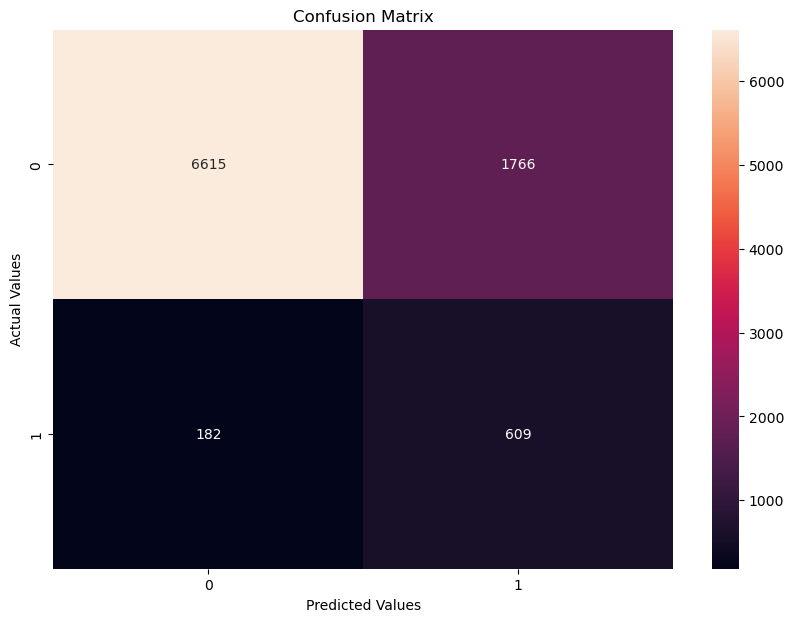

In [19]:
showConfusionMatrix(cm_lr)

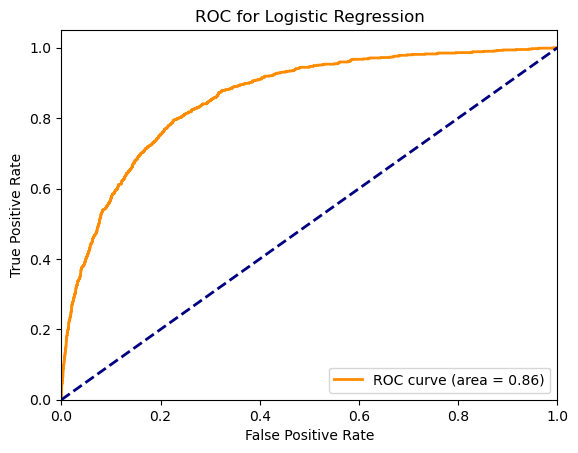

In [20]:
auc_lr = roc_auc_score(y_val, lr.predict_proba(X_val)[:, 1])
plotROC(y_val, lr.predict_proba(X_val)[:, 1], auc_lr, "Logistic Regression")

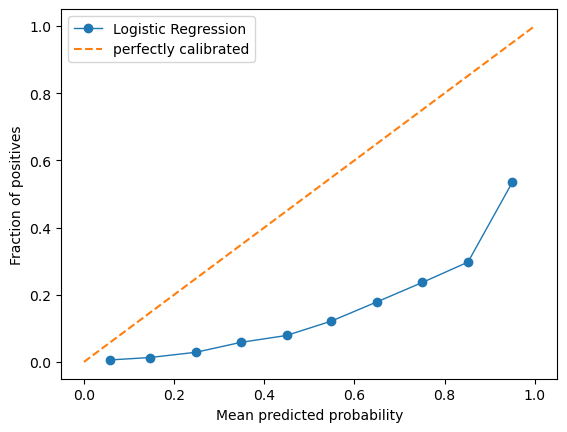

In [75]:
plotCalibration(y_val, lr.predict_proba(X_val)[:, 1], "Logistic Regression")

## Decision Tree

In [140]:
from sklearn.tree import DecisionTreeClassifier

class_weights = {0: 1,    # Class 0 with weight 1
                 1: 3}   # Class 1 with weight 10 (higher weight for minority class)

dt = DecisionTreeClassifier(class_weight=class_weights, max_depth=5)

dt.fit(X_train_res, y_train_res)

dt_pred = dt.predict(X_val)

cm_dt = confusion_matrix(y_val, dt_pred)

accuracy_dt, precision_dt, recall_dt, f1_dt, tpr_dt, tnr_dt = getMetrics(cm_dt)

Accuracy: 0.72
Precision: 0.20
Recall: 0.72
F1: 0.31
True Positive Rate (TPR): 0.718078381795196
True Negative Rate (TNR): 0.7240186135306049


In [64]:
confusion_matrix(y_train_res, dt.predict(X_train_res))

array([[67042,     0],
       [    0, 67042]], dtype=int64)

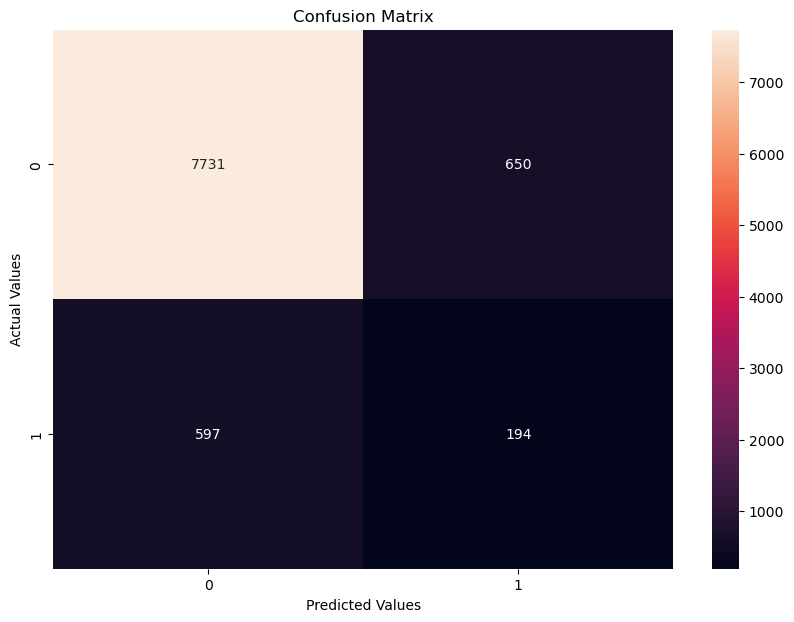

In [62]:
showConfusionMatrix(cm_dt)

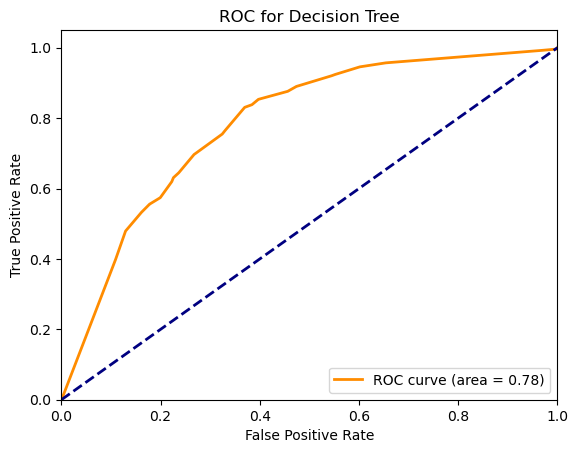

In [106]:
auc_dt = roc_auc_score(y_val, dt.predict_proba(X_val)[:, 1])
plotROC(y_val, dt.predict_proba(X_val)[:, 1], auc_dt, "Decision Tree")

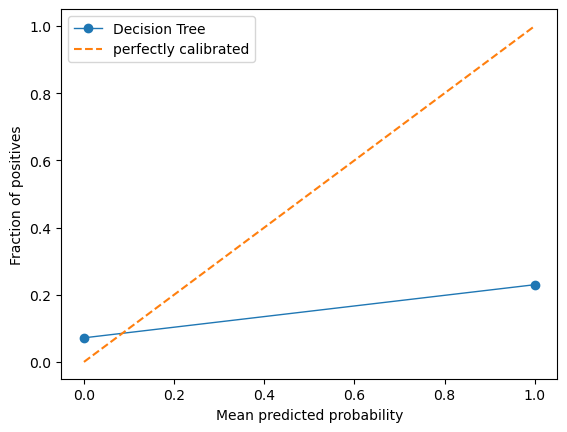

In [74]:
plotCalibration(y_val, dt.predict_proba(X_val)[:, 1], "Decision Tree")

## Random Forest

In [151]:
from sklearn.ensemble import RandomForestClassifier

class_weights_rf = {0: 1,    # Class 0 with weight 1
                 1: 2}   # Class 1 with weight 10 (higher weight for minority class)

rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight=class_weights_rf, max_depth=8)

rf.fit(X_train_res, y_train_res)

rf_pred = rf.predict(X_val)

cm_rf = confusion_matrix(y_val, rf_pred)

In [152]:
accuracy_rf, precision_rf, recall_rf, f1_rf, tpr_rf, tnr_rf = getMetrics(cm_rf)

Accuracy: 0.80
Precision: 0.26
Recall: 0.74
F1: 0.38
True Positive Rate (TPR): 0.7420986093552465
True Negative Rate (TNR): 0.8002624985085312


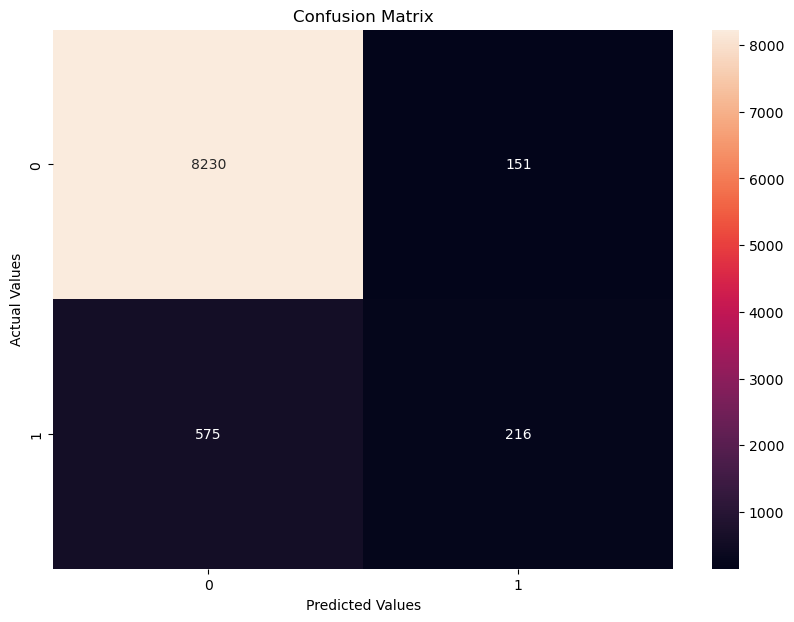

In [38]:
showConfusionMatrix(cm_rf)

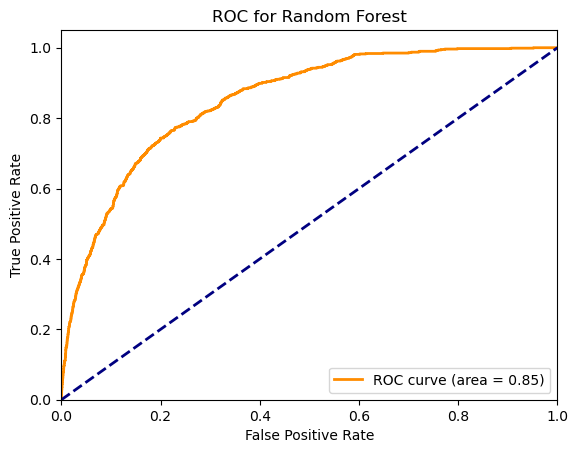

In [153]:
auc_rf = roc_auc_score(y_val, rf.predict_proba(X_val)[:, 1])
plotROC(y_val, rf.predict_proba(X_val)[:, 1], auc_rf, "Random Forest")

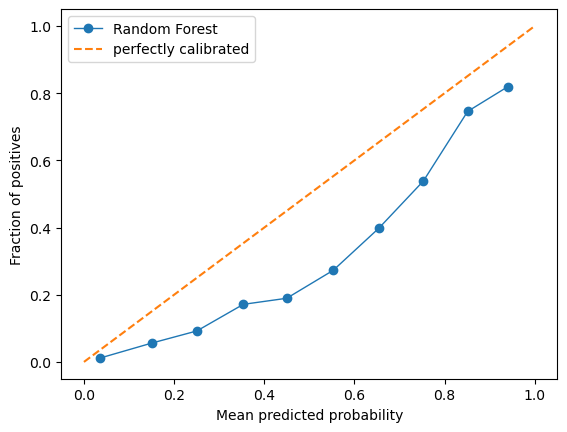

In [73]:
plotCalibration(y_val, rf.predict_proba(X_val)[:, 1], "Random Forest")

## Gradient Boosting

In [28]:
from sklearn.ensemble import HistGradientBoostingClassifier

gb = HistGradientBoostingClassifier(max_iter=100).fit(X_train_res, y_train_res)
gb_pred = gb.predict(X_val)
cm_gb = confusion_matrix(y_val, gb_pred)
accuracy_gb, precision_gb, recall_gb, f1_gb, tpr_gb, tnr_gb = getMetrics(cm_gb)

Accuracy: 0.93
Precision: 0.63
Recall: 0.34
F1: 0.44
True Positive Rate (TPR): 0.34260429835651074
True Negative Rate (TNR): 0.9812671518911824


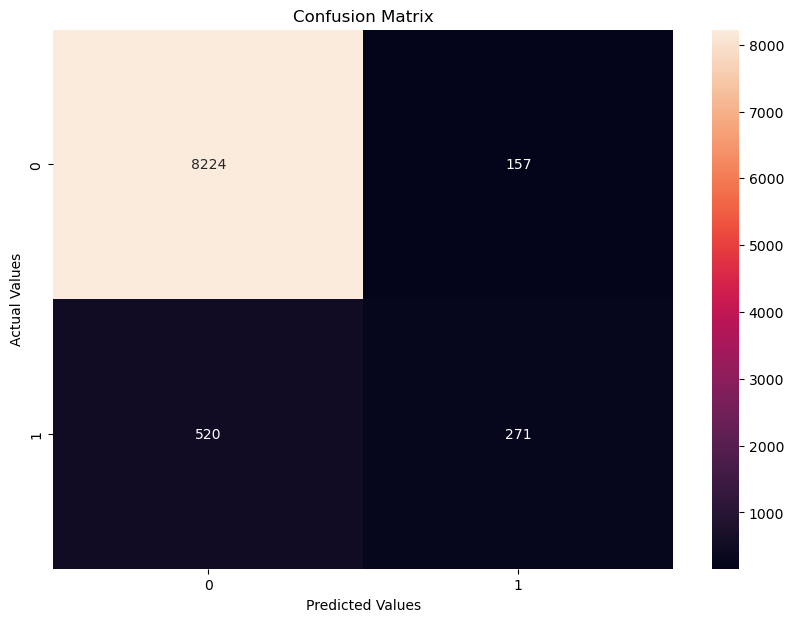

In [29]:
showConfusionMatrix(cm_gb)

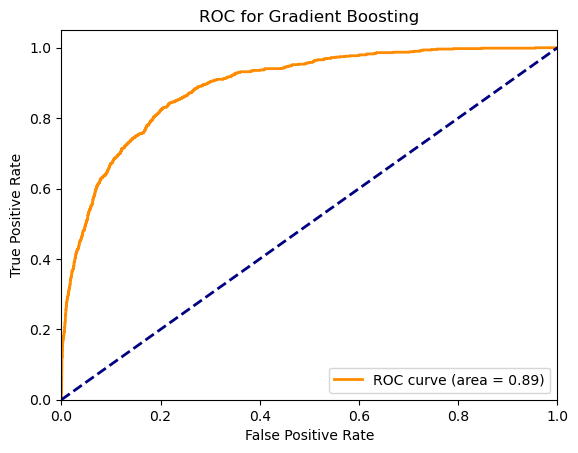

In [30]:
auc_gb = roc_auc_score(y_val, gb.predict_proba(X_val)[:, 1])
plotROC(y_val, gb.predict_proba(X_val)[:, 1], auc_gb, "Gradient Boosting")

## Gradient boosting with cost matrix

In [86]:
cost_matrix = {
    'FP': 1,  # Cost of false positive
    'FN': 10   # Cost of false negative
}

# Compute sample weights based on misclassification costs
sample_weights = []
for y_true in y_train_res:
    if y_true == 0:
        sample_weights.append(cost_matrix['FP'])  # Assign higher weight to false positives
    else:
        sample_weights.append(cost_matrix['FN'])  # Assign higher weight to false negatives

# Instantiate the GradientBoostingClassifier and pass the sample weights
gb_cm = HistGradientBoostingClassifier(random_state=42)
gb_cm.fit(X_train_res, y_train_res, sample_weight=sample_weights)

# Make predictions
gb_cm_pred = gb_cm.predict(X_val)

In [87]:
cm_gb_cm = confusion_matrix(y_val, gb_cm_pred)
accuracy_gb_cm, precision_gb_cm, recall_gb_cm, f1_gb_cm, tpr_gb_cm, tnr_gb_cm = getMetrics(cm_gb_cm)

Accuracy: 0.81
Precision: 0.29
Recall: 0.79
F1: 0.42
True Positive Rate (TPR): 0.7901390644753477
True Negative Rate (TNR): 0.814222646462236


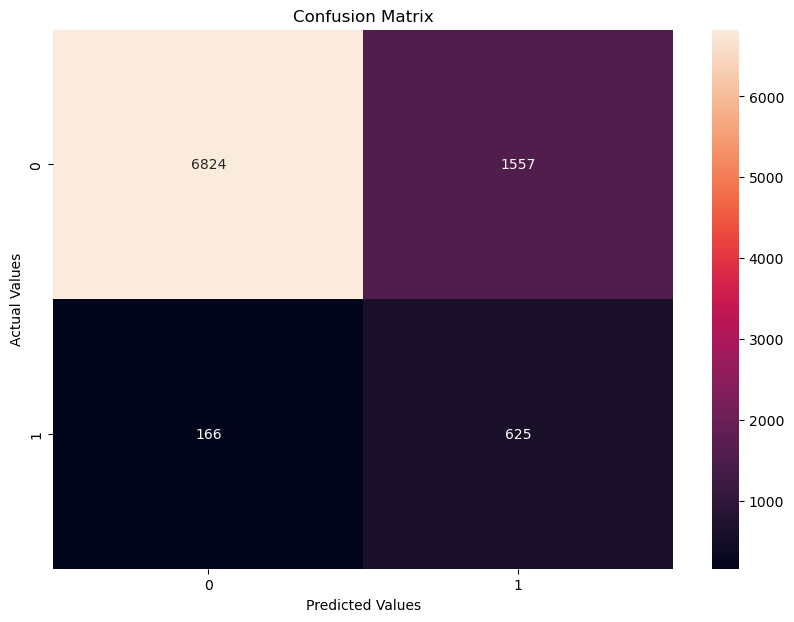

In [88]:
showConfusionMatrix(cm_gb_cm)

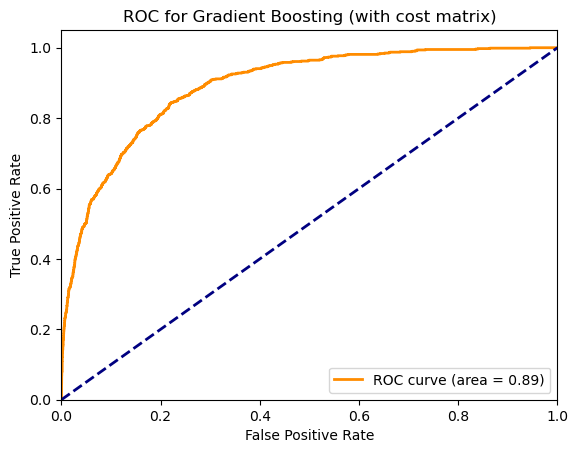

In [89]:
auc_gb_cm = roc_auc_score(y_val, gb_cm.predict_proba(X_val)[:, 1])
plotROC(y_val, gb_cm.predict_proba(X_val)[:, 1], auc_gb_cm, "Gradient Boosting (with cost matrix)")

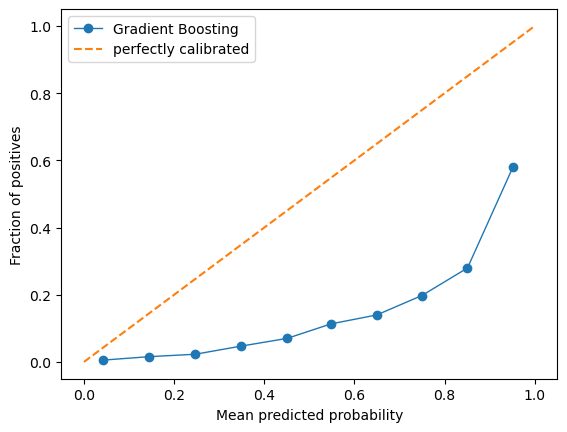

In [72]:
plotCalibration(y_val, gb_cm.predict_proba(X_val)[:, 1], "Gradient Boosting")

## Comparison

In [35]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
dtrain = xgb.DMatrix(X_train_res, label=y_train_res)
dtest = xgb.DMatrix(X_test, label=y_test)
params = {
    'max_depth': 3,
    'eta': 0.1,
    'objective': 'binary:logistic',
    'eval_metric': 'logloss'
}
num_rounds = 100
bst = xgb.train(params, dtrain, num_rounds)
xgb_pred = [round(value) for value in bst.predict(dtest)]
cm_xgb = confusion_matrix(y_test, xgb_pred)
accuracy_xgb, precision_xgb, recall_xgb, f1_xgb, tpr_xgb, tnr_xgb = getMetrics(cm_xgb)

Accuracy: 0.92
Precision: 0.55
Recall: 0.33
F1: 0.41
True Positive Rate (TPR): 0.3341708542713568
True Negative Rate (TNR): 0.9734925373134329


Logistic Regression
Accuracy: 0.79
True Positive Rate (TPR): 0.77
True Negative Rate (TNR): 0.79

Decision Tree
Accuracy: 0.72
True Positive Rate (TPR): 0.72
True Negative Rate (TNR): 0.72

Random Forest
Accuracy: 0.80
True Positive Rate (TPR): 0.74
True Negative Rate (TNR): 0.80

Gradient Boosting
Accuracy: 0.81
True Positive Rate (TPR): 0.79
True Negative Rate (TNR): 0.81



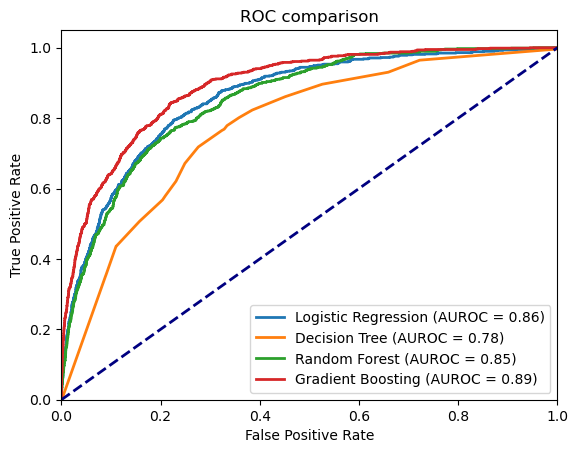

In [156]:
models = [lr, dt, rf, gb_cm]
names = ["Logistic Regression", "Decision Tree", "Random Forest", "Gradient Boosting"]

for i in range(len(models)):
    fpr, tpr, thresholds = roc_curve(y_val, models[i].predict_proba(X_val)[:, 1])
    auc_roc = roc_auc_score(y_val, models[i].predict_proba(X_val)[:, 1])
    plt.plot(fpr, tpr, lw=2, label=f'{names[i]} (AUROC = {auc_roc:.2f})')
    print(names[i])
    showRelevantMetrics(confusion_matrix(y_val, models[i].predict(X_val)))
    print()

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC comparison')
plt.legend(loc="lower right")
plt.savefig("comparison.png", dpi=500)
plt.show()

## Evaluation

In [196]:
pred_scores = gb_cm.predict_proba(X_test)

Accuracy: 0.81
Precision: 0.29
Recall: 0.80
F1: 0.42
True Positive Rate (TPR): 0.800251256281407
True Negative Rate (TNR): 0.8124179104477612


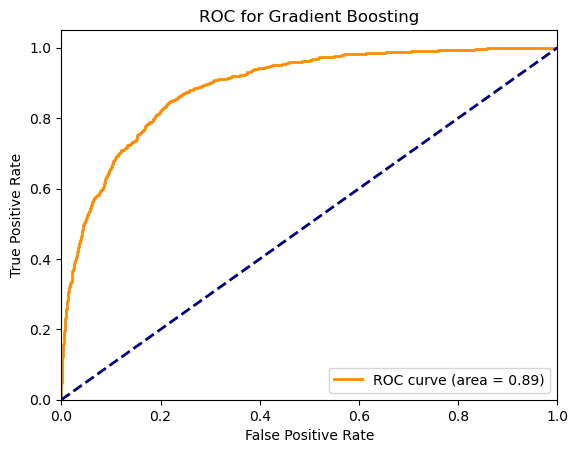

In [294]:
pred_class = gb_cm.predict(X_test)
final_cm = confusion_matrix(y_test, pred_class)
getMetrics(final_cm)
auc_final = roc_auc_score(y_test, pred_scores[:, 1])
plotROC(y_test, pred_scores[:, 1], auc_final, "Gradient Boosting")

In [158]:
df_imputed.columns

Index(['encounter_id', 'patient_id', 'hospital_id', 'hospital_death', 'age',
       'bmi', 'elective_surgery', 'height', 'icu_id', 'pre_icu_los_days',
       ...
       'apache_2_bodysystem_Gastrointestinal',
       'apache_2_bodysystem_Haematologic', 'apache_2_bodysystem_Metabolic',
       'apache_2_bodysystem_Neurologic',
       'apache_2_bodysystem_Renal/Genitourinary',
       'apache_2_bodysystem_Respiratory', 'apache_2_bodysystem_Trauma',
       'apache_2_bodysystem_Undefined Diagnoses',
       'apache_2_bodysystem_Undefined diagnoses', 'apache_2_bodysystem_nan'],
      dtype='object', length=147)

In [233]:
ethnicities = df['ethnicity'].unique()
ethnicities

array(['Caucasian', nan, 'Hispanic', 'African American', 'Asian',
       'Native American', 'Other/Unknown'], dtype=object)

In [234]:
eth = ['African American', 'Asian','Caucasian', 'Hispanic', 'Native American']

In [ ]:
#  'ethnicity_African American',
#  'ethnicity_Asian',
#  'ethnicity_Caucasian',
#  'ethnicity_Hispanic',
#  'ethnicity_Native American',
#  'ethnicity_Other/Unknown',
#  'ethnicity_nan',
#  'gender_F',
#  'gender_M',
#  'gender_nan'

In [230]:
af_test_indices = np.where(X_test['ethnicity_African American'] == 1)[0]
X_test_af = X_test.iloc[af_test_indices]
y_test_af = y_test.iloc[af_test_indices]
pred_af = pred_scores[af_test_indices][:, 1]

as_test_indices = np.where(X_test['ethnicity_Asian'] == 1)[0]
X_test_as = X_test.iloc[as_test_indices]
y_test_as = y_test.iloc[as_test_indices]
pred_as = pred_scores[as_test_indices][:, 1]

ca_test_indices = np.where(X_test['ethnicity_Caucasian'] == 1)[0]
X_test_ca = X_test.iloc[ca_test_indices]
y_test_ca = y_test.iloc[ca_test_indices]
pred_ca = pred_scores[ca_test_indices][:, 1]

hi_test_indices = np.where(X_test['ethnicity_Hispanic'] == 1)[0]
X_test_hi = X_test.iloc[hi_test_indices]
y_test_hi = y_test.iloc[hi_test_indices]
pred_hi = pred_scores[hi_test_indices][:, 1]

na_test_indices = np.where(X_test['ethnicity_Native American'] == 1)[0]
X_test_na = X_test.iloc[na_test_indices]
y_test_na = y_test.iloc[na_test_indices]
pred_na = pred_scores[na_test_indices][:, 1]

In [238]:
len(X_test_af), len(X_test_as), len(X_test_ca), len(X_test_hi), len(X_test_na)

(990, 118, 7027, 413, 68)

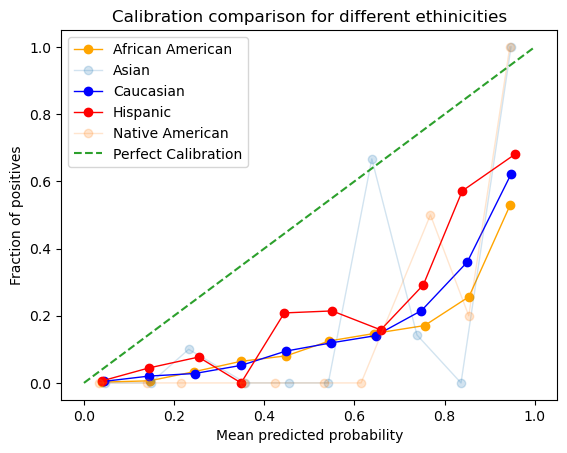

In [289]:
prob_true, prob_pred = calibration_curve(y_test_af, pred_af, n_bins=10, strategy='uniform')
plt.plot(prob_pred, prob_true, marker='o', linewidth=1, label=eth[0], color='orange')

prob_true, prob_pred = calibration_curve(y_test_as, pred_as, n_bins=10, strategy='uniform')
plt.plot(prob_pred, prob_true, marker='o', linewidth=1, label=eth[1], alpha=0.2)

prob_true, prob_pred = calibration_curve(y_test_ca, pred_ca, n_bins=10, strategy='uniform')
plt.plot(prob_pred, prob_true, marker='o', linewidth=1, label=eth[2], color='blue')

prob_true, prob_pred = calibration_curve(y_test_hi, pred_hi, n_bins=10, strategy='uniform')
plt.plot(prob_pred, prob_true, marker='o', linewidth=1, label=eth[3], color='red')

prob_true, prob_pred = calibration_curve(y_test_na, pred_na, n_bins=10, strategy='uniform')
plt.plot(prob_pred, prob_true, marker='o', linewidth=1, label=eth[4], alpha=0.2,)

plt.plot([0, 1], [0, 1], linestyle='--', label='Perfect Calibration')
plt.title('Calibration comparison for different ethinicities')
plt.xlabel('Mean predicted probability')
plt.ylabel('Fraction of positives')
plt.legend()
plt.savefig("calibration_eth.png", dpi=500)
plt.show()

In [271]:
f_test_indices = np.where(X_test['gender_F'] == 1)[0]
X_test_f = X_test.iloc[f_test_indices]
y_test_f = y_test.iloc[f_test_indices]
pred_f = pred_scores[f_test_indices][:, 1]

m_test_indices = np.where(X_test['gender_M'] == 1)[0]
X_test_m = X_test.iloc[m_test_indices]
y_test_m = y_test.iloc[m_test_indices]
pred_m = pred_scores[m_test_indices][:, 1]

In [272]:
len(X_test_f), len(X_test_m)

(4305, 4863)

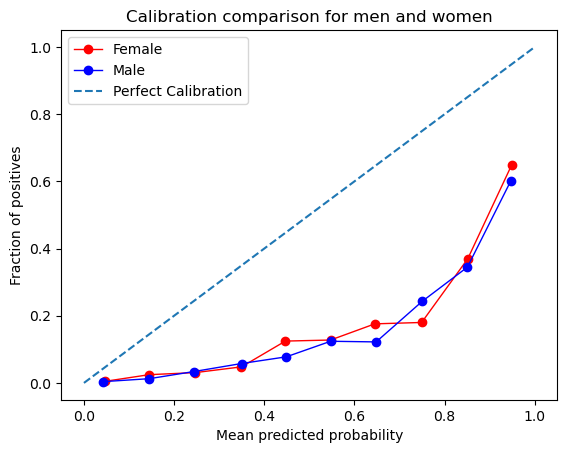

In [290]:
prob_true, prob_pred = calibration_curve(y_test_f, pred_f, n_bins=10, strategy='uniform')
plt.plot(prob_pred, prob_true, marker='o', linewidth=1, label='Female', color='red')

prob_true, prob_pred = calibration_curve(y_test_m, pred_m, n_bins=10, strategy='uniform')
plt.plot(prob_pred, prob_true, marker='o', linewidth=1, label='Male', color='blue')

plt.plot([0, 1], [0, 1], linestyle='--', label='Perfect Calibration')
plt.title('Calibration comparison for men and women')
plt.xlabel('Mean predicted probability')
plt.ylabel('Fraction of positives')
plt.legend()
plt.savefig("calibration_gender.png", dpi=500)
plt.show()

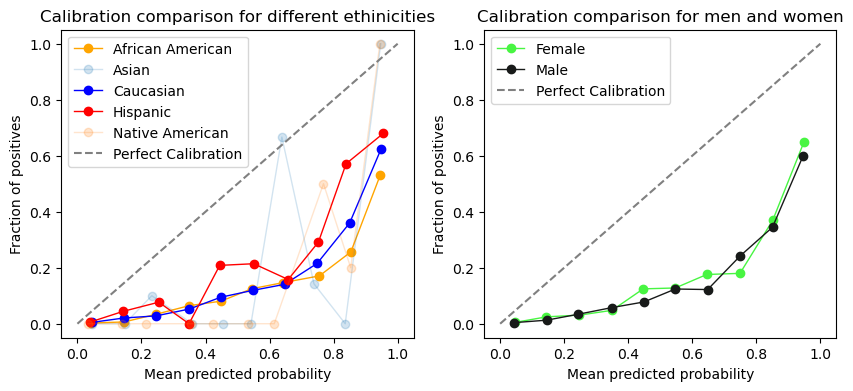

In [293]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
prob_true, prob_pred = calibration_curve(y_test_af, pred_af, n_bins=10, strategy='uniform')
plt.plot(prob_pred, prob_true, marker='o', linewidth=1, label=eth[0], color='orange')

prob_true, prob_pred = calibration_curve(y_test_as, pred_as, n_bins=10, strategy='uniform')
plt.plot(prob_pred, prob_true, marker='o', linewidth=1, label=eth[1], alpha=0.2)

prob_true, prob_pred = calibration_curve(y_test_ca, pred_ca, n_bins=10, strategy='uniform')
plt.plot(prob_pred, prob_true, marker='o', linewidth=1, label=eth[2], color='blue')

prob_true, prob_pred = calibration_curve(y_test_hi, pred_hi, n_bins=10, strategy='uniform')
plt.plot(prob_pred, prob_true, marker='o', linewidth=1, label=eth[3], color='red')

prob_true, prob_pred = calibration_curve(y_test_na, pred_na, n_bins=10, strategy='uniform')
plt.plot(prob_pred, prob_true, marker='o', linewidth=1, label=eth[4], alpha=0.2,)

plt.plot([0, 1], [0, 1], linestyle='--', label='Perfect Calibration', color='grey')
plt.title('Calibration comparison for different ethinicities')
plt.xlabel('Mean predicted probability')
plt.ylabel('Fraction of positives')
plt.legend()


plt.subplot(1, 2, 2)
prob_true, prob_pred = calibration_curve(y_test_f, pred_f, n_bins=10, strategy='uniform')
plt.plot(prob_pred, prob_true, marker='o', linewidth=1, label='Female', color='#48f542')

prob_true, prob_pred = calibration_curve(y_test_m, pred_m, n_bins=10, strategy='uniform')
plt.plot(prob_pred, prob_true, marker='o', linewidth=1, label='Male', color='#181a19')

plt.plot([0, 1], [0, 1], linestyle='--', label='Perfect Calibration', color='grey')
plt.title('Calibration comparison for men and women')
plt.xlabel('Mean predicted probability')
plt.ylabel('Fraction of positives')
plt.legend()

plt.savefig('calibration.png', dpi=500)
plt.show()

In [363]:
def tround(x, threshold):
    return np.where(x > threshold, 1, 0)

In [407]:
df_vs = df.loc[X_test.index].copy()[['hospital_death', 'apache_4a_hospital_death_prob']]
df_vs['gb_hospital_death_prob'] = pred_scores[:, 1]
df_vs['a4_pred'] = tround(df_vs['apache_4a_hospital_death_prob'], 0.5)
df_vs['gb_pred'] = tround(df_vs['gb_hospital_death_prob'], 0.5)
df_vs['abs_diff'] = np.abs(df_vs['apache_4a_hospital_death_prob'] - df_vs['gb_hospital_death_prob'])
df_vs

hospital_death  apache_4a_hospital_death_prob  gb_hospital_death_prob  \
70808               0                           0.12                0.173647   
85078               0                           0.31                0.562724   
62074               0                           0.10                0.093089   
90507               1                           0.04                0.031235   
53078               0                           0.51                0.937378   
...               ...                            ...                     ...   
78582               0                           0.05                0.021712   
24577               0                           0.01                0.056935   
84277               0                           0.08                0.199798   
72528               1                            NaN                0.862191   
64727               0                           0.04                0.223319   

       a4_pred  gb_pred  abs_diff  
70808        0        0  0.053647  
85078        0        1  0.252724  
62074        0        0  0.006911  
90507        0        0  0.008765  
53078        1        1  0.427378  
...        ...      ...       ...  
78582        0        0  0.028288  
24577        0        0  0.046935  
84277        0        0  0.119798  
72528        0        1       NaN  
64727        0        0  0.183319  

[9171 rows x 6 columns]

In [408]:
np.mean(df_vs['abs_diff'])

0.21303774753397295

In [412]:
tp_a4 = ((df_vs['a4_pred'] == 1) & (df_vs['hospital_death'] == 1)).sum()
fp_a4 = ((df_vs['a4_pred'] == 1) & (df_vs['hospital_death'] == 0)).sum()
tn_a4 = ((df_vs['a4_pred'] == 0) & (df_vs['hospital_death'] == 0)).sum()
fn_a4 = ((df_vs['a4_pred'] == 0) & (df_vs['hospital_death'] == 1)).sum()

tpr_a4 = tp_a4 / (tp_a4 + fn_a4)
tnr_a4 = tn_a4 / (tn_a4 + fp_a4)
acc_a4 = (tp_a4 + tn_a4) / (tp_a4 + fp_a4 + tn_a4 + fn_a4)

tpr_a4, tnr_a4, acc_a4

(0.2876884422110553, 0.9745671641791045, 0.9149492966961073)

In [402]:
tp_gb = ((df_vs['gb_pred'] == 1) & (df_vs['hospital_death'] == 1)).sum()
fp_gb = ((df_vs['gb_pred'] == 1) & (df_vs['hospital_death'] == 0)).sum()
tn_gb = ((df_vs['gb_pred'] == 0) & (df_vs['hospital_death'] == 0)).sum()
fn_gb = ((df_vs['gb_pred'] == 0) & (df_vs['hospital_death'] == 1)).sum()

tpr_gb = tp_gb / (tp_gb + fn_gb)
tnr_gb = tn_gb / (tn_gb + fp_gb)
acc_gb = (tp_gb + tn_gb) / (tp_gb + fp_gb + tn_gb + fn_gb)

tpr_gb, tnr_gb, acc_gb

(0.9108040201005025, 0.6826268656716418, 0.7024315777995856)

In [392]:
df_a4_cleaned = df_vs[['hospital_death', 'apache_4a_hospital_death_prob']]
df_a4_cleaned = df_a4_cleaned.dropna(subset=['apache_4a_hospital_death_prob'])

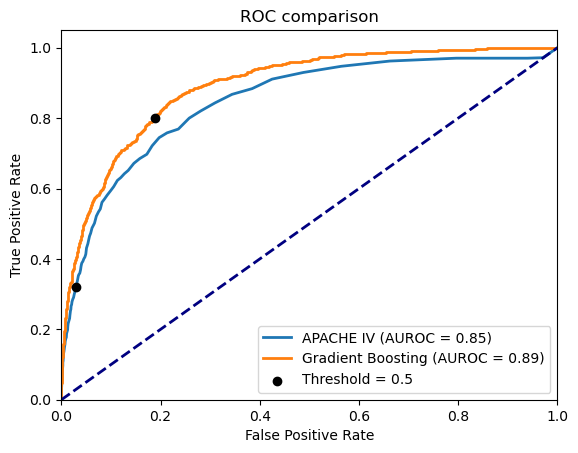

In [424]:
fpr_a4, tpr_a4, thresholds_a4 = roc_curve(df_a4_cleaned['hospital_death'], df_a4_cleaned['apache_4a_hospital_death_prob'])
auc_roc_a4 = roc_auc_score(df_a4_cleaned['hospital_death'], df_a4_cleaned['apache_4a_hospital_death_prob'])
plt.plot(fpr_a4, tpr_a4, lw=2, label=f'{"APACHE IV"} (AUROC = {auc_roc_a4:.2f})')

fpr_gb, tpr_gb, thresholds_gb = roc_curve(y_test, pred_scores[:, 1])
auc_roc_gb = roc_auc_score(y_test, pred_scores[:, 1])
plt.plot(fpr_gb, tpr_gb, lw=2, label=f'{"Gradient Boosting"} (AUROC = {auc_roc_gb:.2f})')

threshold_of_interest = 0.5

closest_threshold_index_a4 = np.argmin(np.abs(thresholds_a4 - threshold_of_interest))
fpr_of_interest_a4, tpr_of_interest_a4 = fpr_a4[closest_threshold_index_a4], tpr_a4[closest_threshold_index_a4]
plt.scatter(fpr_of_interest_a4, tpr_of_interest_a4, color='black', zorder=5, label="Threshold = 0.5")

closest_threshold_index_gb = np.argmin(np.abs(thresholds_gb - threshold_of_interest))
fpr_of_interest_gb, tpr_of_interest_gb = fpr_gb[closest_threshold_index_gb], tpr[closest_threshold_index_gb]
plt.scatter(fpr_of_interest_gb, tpr_of_interest_gb, color='black', zorder=5)

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC comparison')
plt.legend(loc="lower right")
plt.savefig("gb_vs_a4.png", dpi=500)
plt.show()

# Interpreting

In [431]:
#pip install lime

Defaulting to user installation because normal site-packages is not writeable
     -------------------------------------- 275.7/275.7 kB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283846 sha256=b8574c3bb6393124ae662fa238007f0fd70580cbc561703bfce2d9305ba0dc7f
  Stored in directory: c:\users\lukas\appdata\local\pip\cache\wheels\ac\fc\ba\bc2e218408e730b7ad32dc45fbaa1ae6f0ab314e581101bdff
Successfully built lime
Note: you may need to restart the kernel to use updated packages.


In [432]:
import shap
import lime

from shap import Explainer
from lime.lime_tabular import LimeTabularExplainer

## Local explanations

In [435]:
# sample three instances
sample_X = X_test.sample(n=3, random_state=0)
sample_y = y.iloc[sample_X.index]

# display instance, true class, and model confidence
display(sample_X)
print("True class:      %s" %list(sample_y))
print("Predicted class: %s" %[i[1] for i in gb_cm.predict_proba(sample_X)])

age        bmi  elective_surgery  height  pre_icu_los_days  \
77457  88.0  22.965352               0.0   177.8          0.035417   
49722  19.0  30.196057               0.0   167.6          1.205556   
20133  65.0  22.530612               1.0   175.0          2.145139   

       readmission_status  weight  apache_2_diagnosis  apache_3j_diagnosis  \
77457                 0.0   72.60               301.0               403.01   
49722                 0.0   84.82               303.0               211.09   
20133                 0.0   69.00               308.0              1207.01   

       apache_post_operative  ...  apache_3j_bodysystem_Genitourinary  \
77457                    0.0  ...                                 0.0   
49722                    0.0  ...                                 0.0   
20133                    1.0  ...                                 0.0   

       apache_3j_bodysystem_Gynecological  apache_3j_bodysystem_Hematological  \
77457                                 0.0                                 0.0   
49722                                 0.0                                 0.0   
20133                                 0.0                                 0.0   

       apache_3j_bodysystem_Metabolic  \
77457                             0.0   
49722                             0.0   
20133                             0.0   

       apache_3j_bodysystem_Musculoskeletal/Skin  \
77457                                        0.0   
49722                                        0.0   
20133                                        0.0   

       apache_3j_bodysystem_Neurological  apache_3j_bodysystem_Respiratory  \
77457                                1.0                               0.0   
49722                                0.0                               1.0   
20133                                0.0                               0.0   

       apache_3j_bodysystem_Sepsis  apache_3j_bodysystem_Trauma  \
77457                          0.0                          0.0   
49722                          0.0                          0.0   
20133                          0.0                          0.0   

       apache_3j_bodysystem_nan  
77457                       0.0  
49722                       0.0  
20133                       0.0  

[3 rows x 129 columns]

True class:      [1.0, 0.0, 0.0]
Predicted class: [0.962805880814904, 0.09045066074605934, 0.036532503187284154]


### LIME

C:\Users\lukas\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but HistGradientBoostingClassifier was fitted with feature names
  warnings.warn(


age                                   88.000000
bmi                                   22.965352
elective_surgery                       0.000000
height                               177.800000
pre_icu_los_days                       0.035417
                                        ...    
apache_3j_bodysystem_Neurological      1.000000
apache_3j_bodysystem_Respiratory       0.000000
apache_3j_bodysystem_Sepsis            0.000000
apache_3j_bodysystem_Trauma            0.000000
apache_3j_bodysystem_nan               0.000000
Name: 77457, Length: 129, dtype: float64

Local prediction: 1.00
Fit (Rˆ2): 0.06
Intercept: 1.00


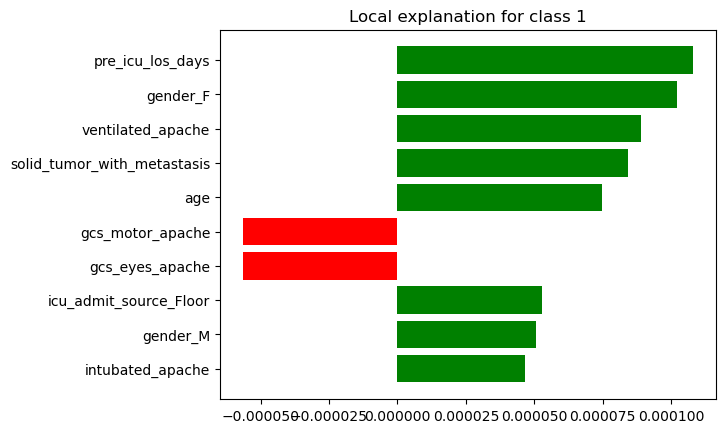

C:\Users\lukas\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but HistGradientBoostingClassifier was fitted with feature names
  warnings.warn(


age                                   19.000000
bmi                                   30.196057
elective_surgery                       0.000000
height                               167.600000
pre_icu_los_days                       1.205556
                                        ...    
apache_3j_bodysystem_Neurological      0.000000
apache_3j_bodysystem_Respiratory       1.000000
apache_3j_bodysystem_Sepsis            0.000000
apache_3j_bodysystem_Trauma            0.000000
apache_3j_bodysystem_nan               0.000000
Name: 49722, Length: 129, dtype: float64

Local prediction: 0.97
Fit (Rˆ2): 0.03
Intercept: 1.00


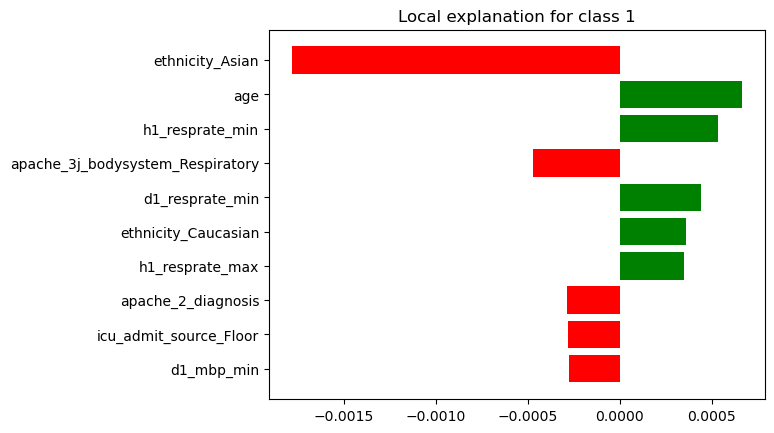

C:\Users\lukas\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but HistGradientBoostingClassifier was fitted with feature names
  warnings.warn(


age                                   65.000000
bmi                                   22.530612
elective_surgery                       1.000000
height                               175.000000
pre_icu_los_days                       2.145139
                                        ...    
apache_3j_bodysystem_Neurological      0.000000
apache_3j_bodysystem_Respiratory       0.000000
apache_3j_bodysystem_Sepsis            0.000000
apache_3j_bodysystem_Trauma            0.000000
apache_3j_bodysystem_nan               0.000000
Name: 20133, Length: 129, dtype: float64

Local prediction: 0.99
Fit (Rˆ2): 0.01
Intercept: 1.00


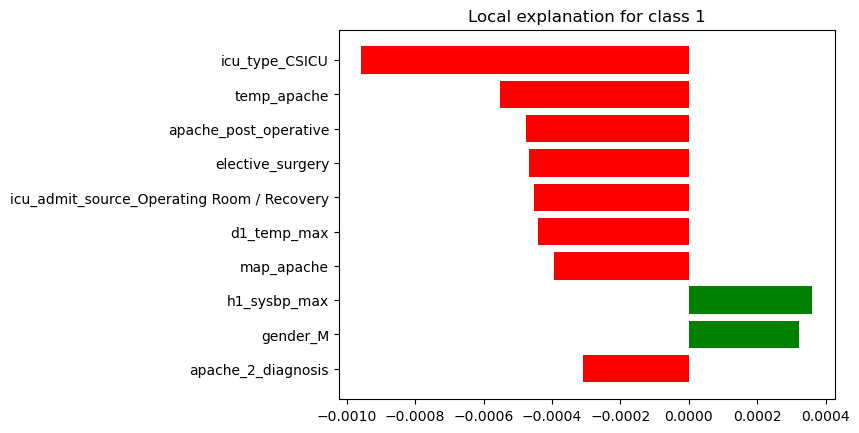

In [441]:
# define lime explainer
lime_explainer = LimeTabularExplainer(
    X_train_res,
    mode="classification",
    feature_names=list(X_train_res),
    kernel_width=np.sqrt(len(X_train_res)),
    discretize_continuous=False,
    feature_selection="forward_selection",
)

# explain the three instances
for i in range(3):
    explanation_i = lime_explainer.explain_instance(
        sample_X.iloc[i],
        gb_cm.predict_proba,
        num_features=10,
        num_samples=5000,
        distance_metric="euclidean",
    )
    display(sample_X.iloc[i])
    print("Local prediction: %.2f" % explanation_i.local_pred)
    print("Fit (Rˆ2): %.2f" % explanation_i.score)
    print("Intercept: %.2f" % explanation_i.intercept[1])
    explanation_i.as_pyplot_figure()
    plt.show()

### SHAP

In [448]:
explainer = Explainer(gb_cm.predict_proba, X_train_res, algorithm="permutation")
shap_values = explainer(sample_X)

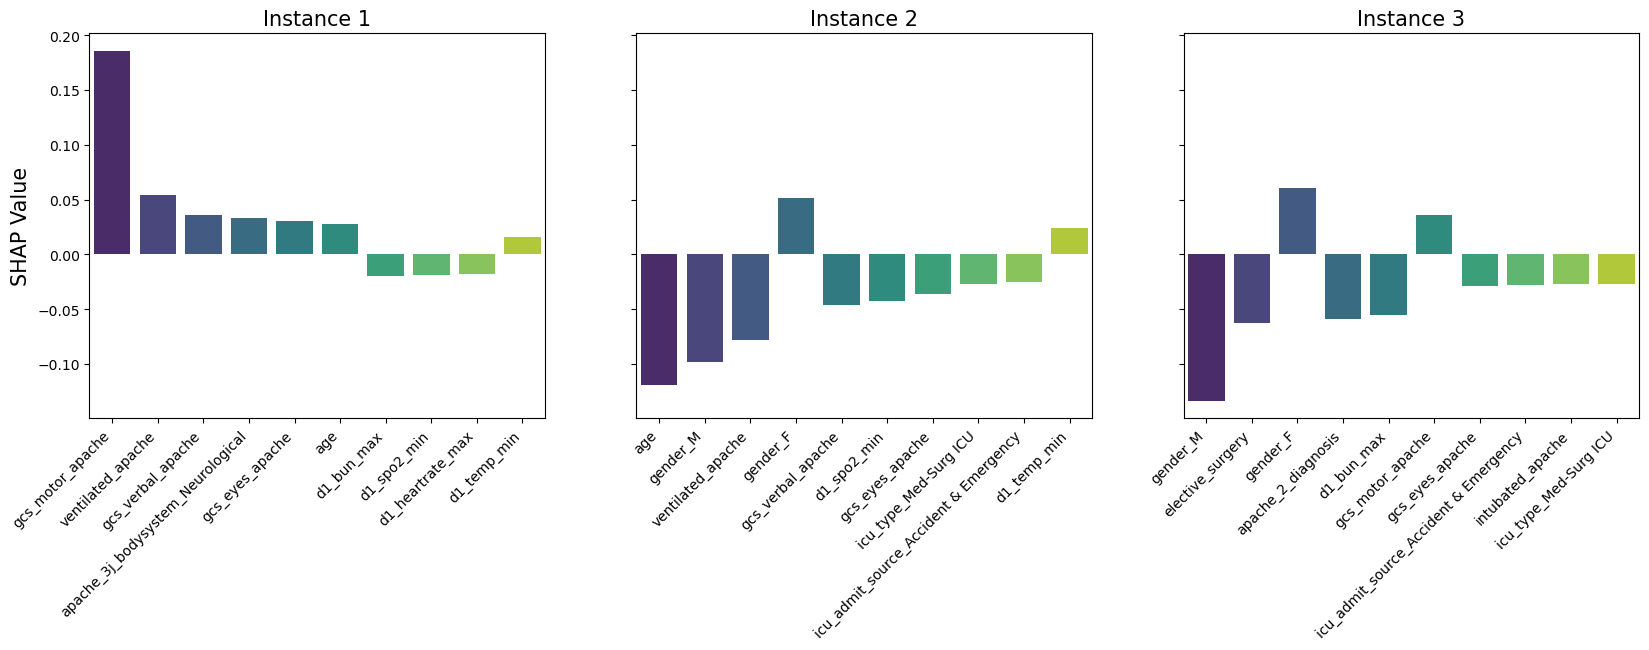

In [551]:
fig, ax = plt.subplots(1, 3, figsize=(20, 5), sharey=True)

for i in range(3):

    index = sample_X.index[i]

    instance = X_train_res.loc[index]
    shap_data_i = pd.DataFrame({
        'Feature Name': instance.index,
        'Feature Value': list(instance),
        'SHAP Value': shap_values.values[i][:, 1],
        'ABS SHAP': abs(shap_values.values[i][:, 1])
    })

    shap_data_i.sort_values('ABS SHAP', ascending=False, inplace=True)
    top_shap_data = shap_data_i.head(10)
    top_shap_data

    # Create the plot
    sns.barplot(x='Feature Name', y='SHAP Value', data=top_shap_data, palette='viridis', ax=ax[i])
    ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=45, ha="right")
    ax[i].set_xlabel('')
    ax[i].set_ylabel('')
    ax[i].set_title(f'Instance {i+1}', fontsize=15)

ax[0].set_ylabel('SHAP Value', fontsize=15)
plt.savefig('SHAP.png', dpi=500, bbox_inches='tight')
plt.show()

## Global explanations

### Global Surrogate Model

In [557]:
import fairlearn
from fairlearn.metrics import true_positive_rate, true_negative_rate

In [558]:
gb_cm_y_pred_train = gb_cm.predict(X_train_res)
gb_cm_y_pred_test = gb_cm.predict(X_test)

# train surrogate model
dt = DecisionTreeClassifier(max_depth=4)
dt.fit(
    X_train_res, gb_cm_y_pred_train
)  # we train a very simple decision tree classifier based on the random forest classifier

y_dt_train = dt.predict(X_train_res)
y_dt_test = dt.predict(X_test)

# compute fidelity
print("\nFidelity")
print(
    "tpr (train) : %.2f \ntnr (train) : %.2f"
    % (
        true_positive_rate(gb_cm_y_pred_train, y_dt_train),
        true_negative_rate(gb_cm_y_pred_train, y_dt_train),
    )
)
print(
    "tpr (test)  : %.2f \ntnr (test)  : %.2f"
    % (
        true_positive_rate(gb_cm_y_pred_test, y_dt_test),
        true_negative_rate(gb_cm_y_pred_test, y_dt_test),
    )
)

# compute predictive performance
print("\nPredictive Performance")
print(
    "tpr (train) : %.2f \ntnr (train) : %.2f"
    % (true_positive_rate(y_train_res, y_dt_train), true_negative_rate(y_train_res, y_dt_train))
)
print(
    "tpr (test)  : %.2f \ntnr (test)  : %.2f"
    % (true_positive_rate(y_test, y_dt_test), true_negative_rate(y_test, y_dt_test))
)


Fidelity
tpr (train) : 0.91 
tnr (train) : 0.80
tpr (test)  : 0.82 
tnr (test)  : 0.80

Predictive Performance
tpr (train) : 0.92 
tnr (train) : 0.70
tpr (test)  : 0.80 
tnr (test)  : 0.70


In [559]:
pd.Series(dt.feature_importances_, list(X_train_res)).sort_values(ascending=False).head(10)

ventilated_apache           0.596151
gcs_verbal_apache           0.132924
elective_surgery            0.096288
d1_sysbp_noninvasive_min    0.056544
gcs_motor_apache            0.043215
d1_bun_max                  0.035782
d1_bun_min                  0.021629
apache_3j_diagnosis         0.009707
d1_resprate_max             0.006737
apache_3j_bodysystem_nan    0.001023
dtype: float64

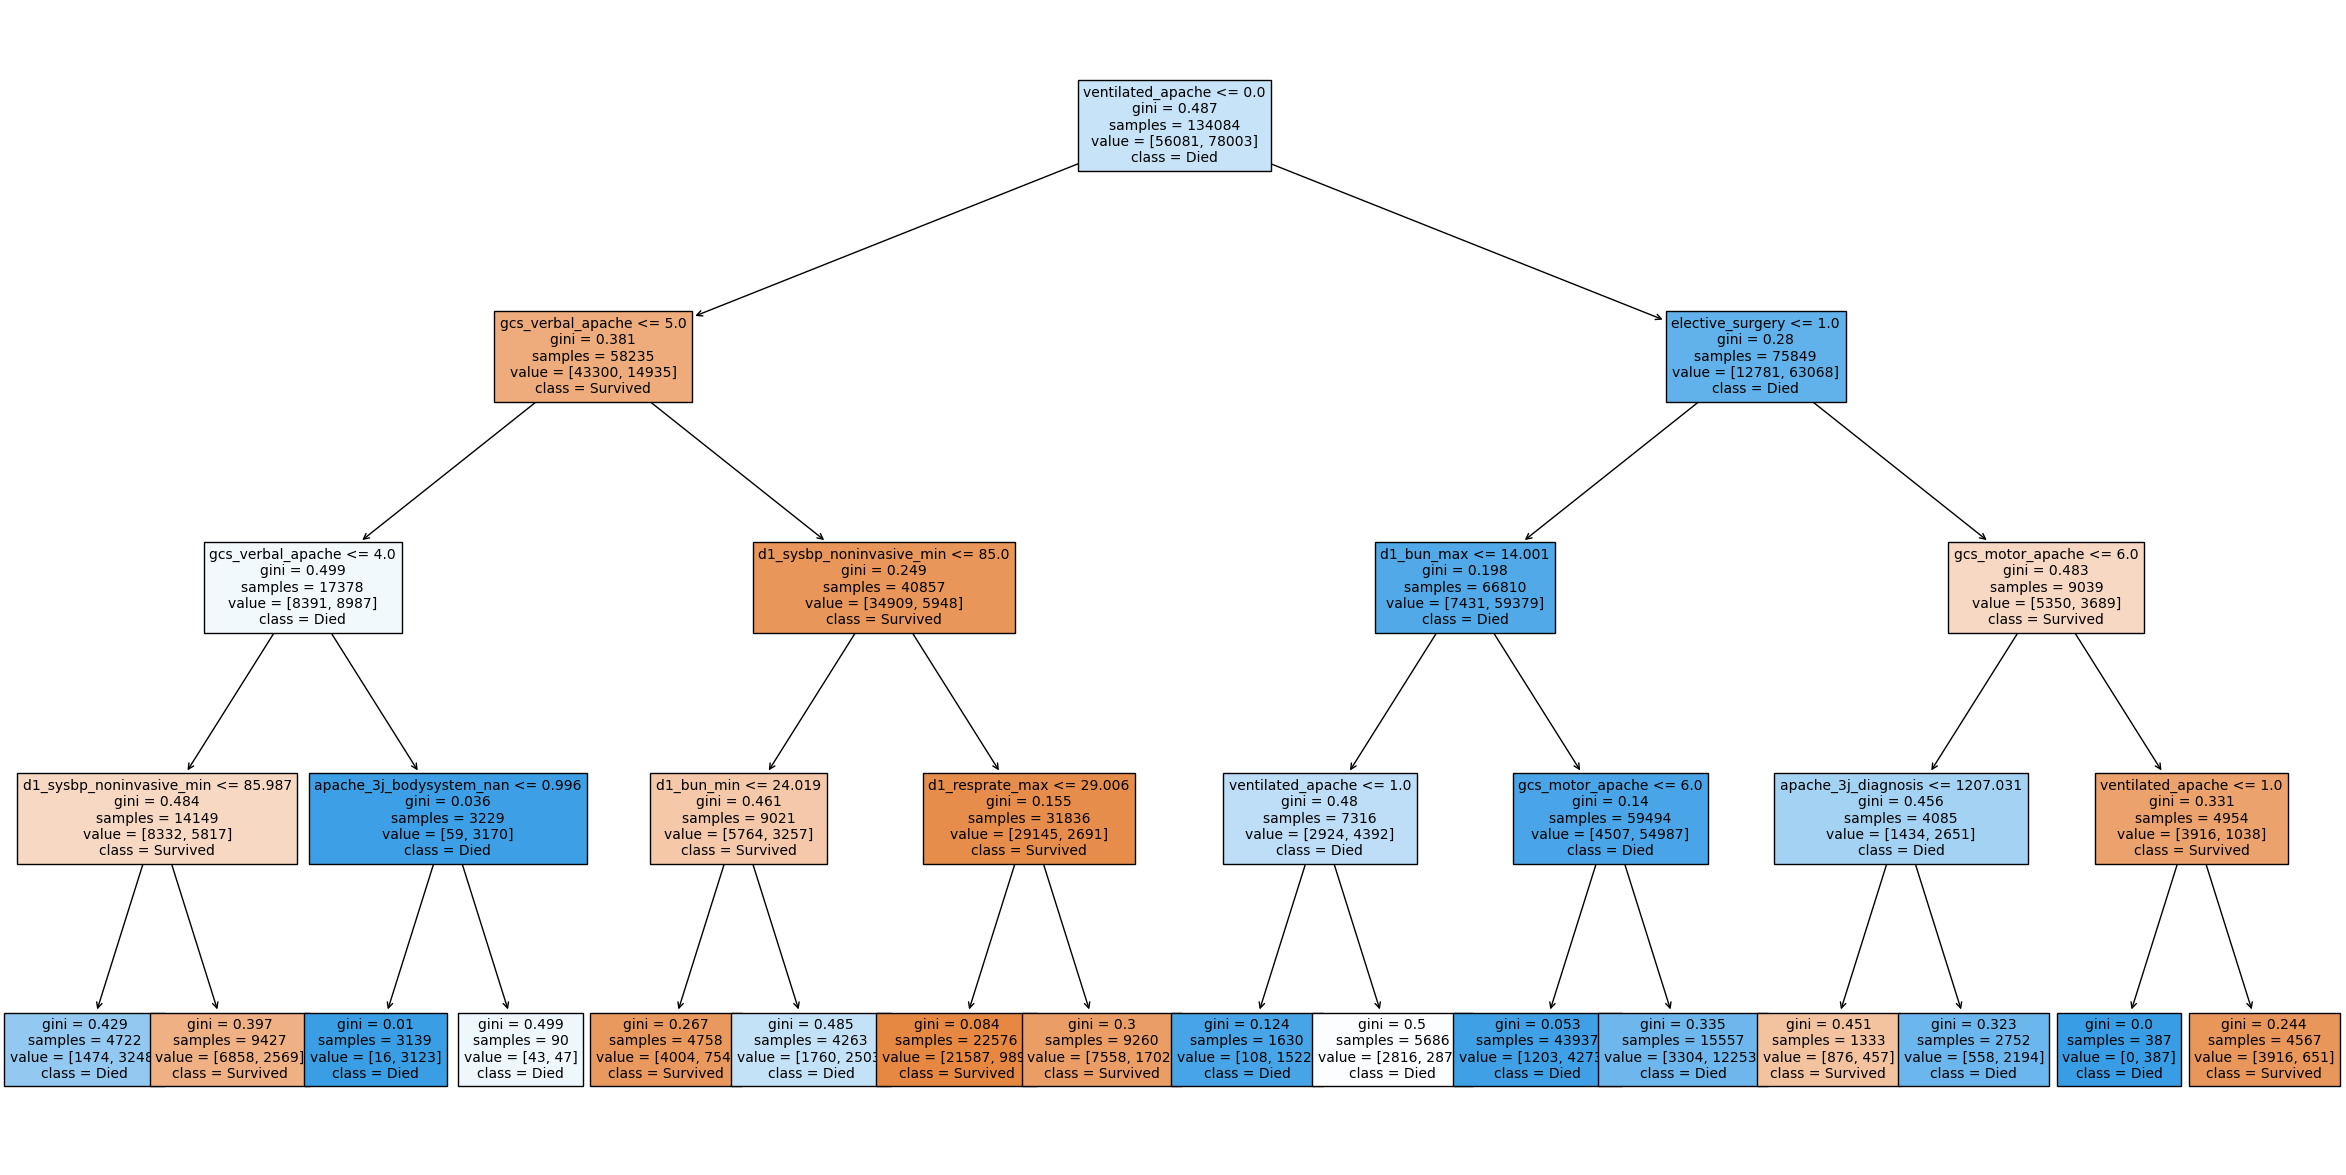

In [562]:
from sklearn.tree import plot_tree

fig = plt.figure(figsize=(30, 15))
fig = plot_tree(
    dt,
    fontsize=10,
    feature_names=list(X_train_res),
    class_names=["Survived", "Died"],
    filled=True,
)
plt.show()